In [1]:
# Neural Network class definitions
import numpy
import scipy.special

class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        
        # set the number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # Weights - Heart of the Neural Network
        # link Weight matrices, 
        # weights inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        # Get weight sample from a normal probability distribution centered around zero with standard deviation that is
        # related to the number of incoming links into a node. 1/root(number of incoming links)
        
        # wih = Weight to apply for values moving from input to output layers
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        # who = Weight to apply for values moving from hidden layer to output layer
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
        
        # learning rate
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the network
    def train(self, inputs_list, targets_list):
        # 1. Work out for a given training example
        # 2. Take calculated example from (1); compare it to desired output, and use the difference 
        # to guide the updating of network weights
        
        # convert input list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # Calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # Calculate signals coming out of hidden layer (sigmoid application)
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # Calculate signals into the output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # Calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is the (target - actual)
        output_errors = targets - final_outputs
        
        # Calculate the back-propagation errors for the hidden layer nodes.
        # we split the errors according to the connected weights, and recombine them for each 
        # hidden layer node.
        # mathematically this (errors of hidden = weights of hidden output * errors from output layer)
        # This effectively gives us what we need to refine the weights at each layer. 
        
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # print(numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs)))
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), 
                                        numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the hidden and output layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), 
                                        numpy.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, input_list):
        # convert input list into a sd array
        inputs = numpy.array(input_list, ndmin=2).T
        # print(inputs)
        # print(input_list)
        # print(self.wih)
        
        # takes the input to a neural network and returns the network's output
        # pass input signal from the input layer of nodes, through hidden and the output layer. Using the link Weight to 
        # to moderate the signals as they feed into any given node (output or hidden)
        
        # calculate signals into the hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        
        # calculate signal emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # calculate the signals emerging from the final output layer
        final_outputs = self.activation_function(final_inputs)
        
        return final_outputs

In [2]:
# number of input, hidden and output nodes
# The ultimate goal is to find features or patterns.
# the hand-written image is 28 * 28 = 784px. So our input nodes should be 784
input_nodes = 784

# No science here. But we cannot be more than the input_nodes.
# Choosing a number smaller than input forces the network to summarise the key features.
hidden_nodes = 200

# the output is in effect what we are asking the network - classify images and assign
# labels. The labels are 10 numbers. Therefore we should have output layer of 10
output_nodes = 10

# learning rate
learning_rate = 0.3

# create instance of the neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [3]:
training_data_file = open("NeuralNetwork/TrainAndTestData/mnist_train.csv")
training_data_list = training_data_file.readlines()
training_data_file.close()
# train and test files have extra line in them, hack the line out for now.
if training_data_list[-1] == '\n':
    training_data_list = training_data_list[:training_data_list.__len__() - 1]

In [4]:
# train the neural network
# go through all records in the training data set
for record in training_data_list:
    # split the record into array on ','
    all_values = record.split(',')

    # scale scale and shift the input - so as to keep them in the comfort zone 
    # of the node activation function
    # As each value is an color array value of 0-255 array, we will try and bring
    # them down into the range 0.01 to  1.00.
    # Divide by 255 to bring to 0-1 range
    # Multiply by 0.99 to bring to 0.0-0.9 range
    # Add 0.01 to shift to the desired range of 0.01 -  1.00
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    
    # create the target output values (all 0.01, except the desired label which is 0.99)
    targets = numpy.zeros(output_nodes) + 0.01
    
    # all_values[0] is the target label for this record -> the first row contain the target label value 
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

[[-0.04756073 -0.04343309 -0.09450609 ..., -0.02977459 -0.06982281
  -0.08901784]
 [-0.03666317 -0.03348129 -0.07285197 ..., -0.02295236 -0.05382436
  -0.06862124]
 [-0.04654917 -0.04250933 -0.09249607 ..., -0.02914133 -0.06833777
  -0.08712455]
 ..., 
 [-0.04150218 -0.03790035 -0.08246738 ..., -0.02598174 -0.0609284
  -0.07767826]
 [-0.04651492 -0.04247804 -0.092428   ..., -0.02911988 -0.06828748
  -0.08706043]
 [-0.03930545 -0.03589426 -0.07810234 ..., -0.02460651 -0.05770343
  -0.07356671]]
[[  1.55045951e-04   1.83981024e-04   4.66252355e-04 ...,   4.40139454e-05
    1.75853451e-03   1.16115240e-03]
 [  1.27037739e-06   1.50745848e-06   3.82026390e-06 ...,   3.60630644e-07
    1.44086476e-05   9.51396502e-06]
 [  1.75031985e-06   2.07696904e-06   5.26354122e-06 ...,   4.96875166e-07
    1.98521654e-05   1.31082952e-05]
 ..., 
 [  1.32673188e-07   1.57432999e-07   3.98973246e-07 ...,   3.76628375e-08
    1.50478215e-06   9.93600862e-07]
 [  1.35392776e-06   1.60660124e-06   4.071515

[[  2.04000919e-07   1.34685042e-06   1.30159482e-06 ...,   7.95838884e-06
    8.20629961e-06   7.80149509e-08]
 [  3.72121506e-07   2.45681249e-06   2.37426100e-06 ...,   1.45170309e-05
    1.49692491e-05   1.42308384e-07]
 [  6.03706937e-07   3.98578077e-06   3.85185433e-06 ...,   2.35515339e-05
    2.42851847e-05   2.30872328e-07]
 ..., 
 [ -7.64573260e-07  -5.04784890e-06  -4.87823584e-06 ...,  -2.98271759e-05
   -3.07563185e-05  -2.92391552e-07]
 [  3.67919003e-07   2.42906682e-06   2.34744761e-06 ...,   1.43530848e-05
    1.48001959e-05   1.40701244e-07]
 [ -2.56291006e-04  -1.69207889e-03  -1.63522325e-03 ...,  -9.99830536e-03
   -1.03097613e-02  -9.80119616e-05]]
[[  7.87502927e-07   5.65045345e-06   2.12399470e-06 ...,   2.28502340e-05
    2.40065099e-05   5.35222206e-06]
 [ -3.77512974e-03  -2.70871309e-02  -1.01820010e-02 ...,  -1.09539400e-01
   -1.15082353e-01  -2.56574699e-02]
 [  5.63288788e-07   4.04168286e-06   1.51926089e-06 ...,   1.63444226e-05
    1.71714890e-05   


[[ -3.77455984e-07  -4.16229896e-06  -4.05105328e-07 ...,  -1.90061894e-05
   -2.31904011e-05  -1.11520988e-08]
 [ -2.93513976e-08  -3.23665001e-07  -3.15014413e-08 ...,  -1.47794245e-06
   -1.80331141e-06  -8.67199620e-10]
 [ -5.51942602e-05  -6.08640534e-04  -5.92373410e-05 ...,  -2.77921826e-03
   -3.39106303e-03  -1.63073807e-06]
 ..., 
 [ -2.12185054e-06  -2.33981620e-05  -2.27727998e-06 ...,  -1.06842373e-04
   -1.30363717e-04  -6.26909834e-08]
 [  1.73543532e-07   1.91370675e-06   1.86255914e-07 ...,   8.73850563e-06
    1.06622872e-05   5.12741803e-09]
 [  6.97544144e-08   7.69198897e-07   7.48640533e-08 ...,   3.51237143e-06
    4.28561984e-06   2.06092407e-09]]
[[ -2.83333921e-05  -9.83414028e-06  -1.34872156e-05 ...,  -3.17188479e-05
   -1.08708193e-04  -8.55467003e-07]
 [ -6.28462556e-05  -2.18130921e-05  -2.99159731e-05 ...,  -7.03555300e-05
   -2.41125483e-04  -1.89751010e-06]
 [ -6.00391044e-04  -2.08387676e-04  -2.85797175e-04 ...,  -6.72129625e-04
   -2.30355141e-03  

[[ -1.52779393e-06  -1.24789953e-05  -4.46913519e-05 ...,  -3.85220540e-05
   -7.49788493e-05  -6.58430791e-07]
 [  3.74017450e-07   3.05496830e-06   1.09408377e-05 ...,   9.43053910e-06
    1.83554847e-05   1.61189674e-07]
 [ -3.38456009e-06  -2.76450304e-05  -9.90058693e-05 ...,  -8.53388693e-05
   -1.66102520e-04  -1.45863819e-06]
 ..., 
 [  6.83440040e-04   5.58232685e-03   1.99921329e-02 ...,   1.72323725e-02
    3.35408767e-02   2.94541009e-04]
 [ -1.07206784e-05  -8.75663222e-05  -3.13603556e-04 ...,  -2.70312994e-04
   -5.26133867e-04  -4.62027280e-06]
 [ -2.04561436e-04  -1.67085440e-03  -5.98387451e-03 ...,  -5.15784658e-03
   -1.00391688e-02  -8.81594997e-05]]
[[  8.00381182e-08   4.49174969e-07   4.03262073e-08 ...,   8.65015172e-07
    9.69472620e-07   7.72519963e-09]
 [  1.68339124e-06   9.44721370e-06   8.48155672e-07 ...,   1.81933183e-05
    2.03903059e-05   1.62479249e-07]
 [  4.58707544e-07   2.57427275e-06   2.31114073e-07 ...,   4.95750018e-06
    5.55615767e-06   

[[  1.78880264e-06   1.02346527e-05   2.70534298e-07 ...,   4.52341957e-06
    2.26088112e-05   4.71612076e-07]
 [ -1.33907254e-04  -7.66151736e-04  -2.02518177e-05 ...,  -3.38616838e-04
   -1.69246387e-03  -3.53042179e-05]
 [  1.74895922e-06   1.00066882e-05   2.64508472e-07 ...,   4.42266585e-06
    2.21052272e-05   4.61107485e-07]
 ..., 
 [  3.77398475e-07   2.15928927e-06   5.70768564e-08 ...,   9.54343207e-07
    4.76996774e-06   9.94998971e-08]
 [  1.13443071e-03   6.49065701e-03   1.71568629e-04 ...,   2.86868208e-03
    1.43381552e-02   2.99089017e-04]
 [  1.29849632e-06   7.42936007e-06   1.96381525e-07 ...,   3.28356160e-06
    1.64117927e-05   3.42344388e-07]]
[[  4.11996134e-07   1.85703258e-06   1.35762329e-07 ...,   1.39227664e-05
    1.47714276e-05   2.19105616e-08]
 [  5.12865560e-07   2.31169172e-06   1.69001155e-07 ...,   1.73314913e-05
    1.83879310e-05   2.72749464e-08]
 [  2.70258013e-03   1.21816176e-02   8.90563142e-04 ...,   9.13294782e-02
    9.68964598e-02   

[[  6.60422363e-07   7.45453919e-07   8.11200885e-08 ...,   1.23105905e-05
    1.14584777e-05   3.27681336e-08]
 [  5.39647843e-07   6.09129282e-07   6.62852793e-08 ...,   1.00592954e-05
    9.36301242e-06   2.67756721e-08]
 [  5.22493068e-07   5.89765773e-07   6.41781476e-08 ...,   9.73952210e-06
    9.06537318e-06   2.59245047e-08]
 ..., 
 [  7.18955362e-07   8.11523234e-07   8.83097330e-08 ...,   1.34016737e-05
    1.24740385e-05   3.56723616e-08]
 [  9.72981702e-07   1.09825630e-06   1.19511946e-07 ...,   1.81368469e-05
    1.68814531e-05   4.82763701e-08]
 [  6.07784712e-05   6.86038997e-05   7.46545731e-06 ...,   1.13293994e-03
    1.05452025e-03   3.01564147e-06]]
[[  5.79818276e-06   1.33750776e-06   3.56391700e-08 ...,   2.19162491e-05
    2.18146235e-05   4.24232806e-08]
 [  5.50530752e-06   1.26994816e-06   3.38389801e-08 ...,   2.08092252e-05
    2.07127329e-05   4.02804147e-08]
 [  4.92320698e-06   1.13567092e-06   3.02610349e-08 ...,   1.86089737e-05
    1.85226839e-05   

[[ -6.14279454e-06  -1.32685060e-05  -7.89161345e-08 ...,  -4.79386171e-04
   -6.18867534e-04  -3.56590657e-08]
 [  1.51125009e-07   3.26431735e-07   1.94149445e-09 ...,   1.17938568e-05
    1.52253768e-05   8.77284205e-10]
 [  2.78510368e-07   6.01585557e-07   3.57800697e-09 ...,   2.17350618e-05
    2.80590574e-05   1.61675919e-09]
 ..., 
 [  9.47851995e-08   2.04737107e-07   1.21770010e-09 ...,   7.39707531e-06
    9.54931542e-06   5.50230296e-10]
 [  6.55759593e-08   1.41644817e-07   8.42450645e-10 ...,   5.11757439e-06
    6.60657489e-06   3.80669975e-10]
 [  6.34871800e-08   1.37133030e-07   8.15616216e-10 ...,   4.95456521e-06
    6.39613684e-06   3.68544562e-10]]
[[ -1.65600697e-06  -9.96559658e-06  -6.35725536e-08 ...,  -4.73236108e-05
   -2.02195050e-04  -3.32143256e-07]
 [ -4.17374880e-06  -2.51169818e-05  -1.60226300e-07 ...,  -1.19272967e-04
   -5.09606157e-04  -8.37123601e-07]
 [  2.46153065e-05   1.48131149e-04   9.44958521e-07 ...,   7.03430123e-04
    3.00547837e-03   

[[  2.85108876e-07   2.25434435e-07   1.81306083e-07 ...,   4.58633849e-08
    1.17598620e-05   9.94688456e-09]
 [  3.73140165e-07   2.95040420e-07   2.37286831e-07 ...,   6.00243363e-08
    1.53908812e-05   1.30181221e-08]
 [  5.11355234e-07   4.04326516e-07   3.25180387e-07 ...,   8.22579861e-08
    2.10918266e-05   1.78401724e-08]
 ..., 
 [  7.89079031e-09   6.23921599e-09   5.01790159e-09 ...,   1.26933387e-09
    3.25470769e-07   2.75294061e-10]
 [  4.08788108e-07   3.23227104e-07   2.59956026e-07 ...,   6.57587607e-08
    1.68612489e-05   1.42618082e-08]
 [  6.45507833e-08   5.10400434e-08   4.10490541e-08 ...,   1.03838136e-08
    2.66252077e-06   2.25204911e-09]]
[[ -1.67483759e-07  -7.27990033e-06  -1.26052322e-08 ...,  -1.07547489e-08
   -3.17503306e-05  -9.10114283e-09]
 [  1.11123436e-07   4.83012525e-06   8.36341814e-09 ...,   7.13564496e-09
    2.10659579e-05   6.03849748e-09]
 [ -8.98892866e-05  -3.90715523e-03  -6.76528480e-06 ...,  -5.77212206e-06
   -1.70405452e-02  -

[[  5.68185519e-09   8.45175282e-08   4.81285953e-10 ...,   4.47572302e-10
    1.90712026e-08   5.95808717e-10]
 [  3.09760639e-07   4.60768582e-06   2.62385153e-08 ...,   2.44005308e-08
    1.03971462e-06   3.24820121e-08]
 [ -7.23672501e-07  -1.07646198e-05  -6.12992407e-08 ...,  -5.70052838e-08
   -2.42901384e-06  -7.58854934e-08]
 ..., 
 [  3.24564986e-07   4.82790030e-06   2.74925290e-08 ...,   2.55667019e-08
    1.08940555e-06   3.40344204e-08]
 [  1.00333553e-04   1.49246040e-03   8.49883143e-06 ...,   7.90349589e-06
    3.36770552e-04   1.05211420e-05]
 [ -4.37888704e-04  -6.51358925e-03  -3.70917025e-05 ...,  -3.44934619e-05
   -1.46977772e-03  -4.59177326e-05]]
[[ -4.65107861e-03  -5.18892836e-04  -4.34609979e-03 ...,  -2.88948323e-05
   -2.17045187e-03  -1.58096885e-04]
 [ -6.48362515e-04  -7.23339020e-05  -6.05848326e-04 ...,  -4.02795302e-06
   -3.02561997e-04  -2.20387790e-05]
 [  8.37343976e-06   9.34174257e-07   7.82437964e-06 ...,   5.20200060e-08
    3.90751253e-06   


[[  1.55114015e-08   4.58040726e-07   5.06696175e-07 ...,   7.67643002e-08
    4.26264790e-08   5.70978272e-08]
 [  6.02940137e-08   1.78043962e-06   1.96956710e-06 ...,   2.98388754e-07
    1.65692410e-07   2.21943657e-07]
 [  9.88281964e-08   2.91832680e-06   3.22832653e-06 ...,   4.89090385e-07
    2.71587195e-07   3.63788873e-07]
 ..., 
 [ -1.93420500e-05  -5.71157069e-04  -6.31828319e-04 ...,  -9.57217781e-05
   -5.31533844e-05  -7.11985327e-05]
 [ -3.65775574e-04  -1.08010942e-02  -1.19484422e-02 ...,  -1.81018497e-03
   -1.00517834e-03  -1.34642833e-03]
 [  1.02433005e-07   3.02477426e-06   3.34608139e-06 ...,   5.06930207e-07
    2.81493477e-07   3.77058258e-07]]
[[ -3.29343667e-04  -7.88503843e-05  -6.66903124e-06 ...,  -1.15718722e-06
   -2.03168069e-04  -5.03432167e-06]
 [  2.42052473e-06   5.79514119e-07   4.90143173e-08 ...,   8.50479473e-09
    1.49319202e-06   3.69999527e-08]
 [  7.97230594e-07   1.90870343e-07   1.61434886e-08 ...,   2.80116228e-09
    4.91801777e-07  

[[  1.18608536e-06   7.40616645e-07   7.25512565e-08 ...,   2.06092219e-08
    4.67373018e-07   8.74225447e-07]
 [  8.17203130e-07   5.10278821e-07   4.99872233e-08 ...,   1.41995856e-08
    3.22016194e-07   6.02334195e-07]
 [ -3.22569803e-06  -2.01419369e-06  -1.97311638e-07 ...,  -5.60491924e-08
   -1.27107565e-06  -2.37755848e-06]
 ..., 
 [  3.59928934e-06   2.24747196e-06   2.20163719e-07 ...,   6.25406527e-08
    1.41828807e-06   2.65292063e-06]
 [ -6.51923538e-05  -4.07074768e-05  -3.98772916e-06 ...,  -1.13277149e-06
   -2.56888316e-05  -4.80511913e-05]
 [ -2.48438112e-04  -1.55129982e-04  -1.51966273e-05 ...,  -4.31681930e-06
   -9.78962172e-05  -1.83115757e-04]]
[[  7.12519935e-09   3.94431701e-08   3.39862688e-09 ...,   1.82883524e-08
    4.84211992e-09   1.61077957e-11]
 [ -1.42777639e-05  -7.90378267e-05  -6.81030662e-06 ...,  -3.66469435e-05
   -9.70283661e-06  -3.22774555e-08]
 [  2.18413563e-09   1.20907822e-08   1.04180412e-09 ...,   5.60605255e-09
    1.48428782e-09   


[[  1.05821299e-08   3.77133831e-08   3.69775370e-06 ...,   1.51381247e-06
    1.09360656e-07   2.48574403e-09]
 [  6.44286536e-09   2.29615637e-08   2.25135482e-06 ...,   9.21675505e-07
    6.65835693e-08   1.51343011e-09]
 [  2.91890397e-08   1.04026075e-07   1.01996366e-05 ...,   4.17559912e-06
    3.01653122e-07   6.85651015e-09]
 ..., 
 [  7.74496444e-06   2.76020814e-05   2.70635223e-03 ...,   1.10794555e-03
    8.00400672e-05   1.81929340e-06]
 [  4.07292704e-08   1.45154009e-07   1.42321831e-05 ...,   5.82647142e-06
    4.20915237e-07   9.56731220e-09]
 [  3.87294412e-08   1.38026869e-07   1.35333752e-05 ...,   5.54038853e-06
    4.00248071e-07   9.09755201e-09]]
[[  2.41374237e-09   1.48244574e-08   1.93564713e-10 ...,   3.11813018e-10
    7.86282373e-09   2.54917608e-10]
 [ -7.34226107e-09  -4.50938915e-08  -5.88796333e-10 ...,  -9.48490863e-10
   -2.39175917e-08  -7.75423116e-10]
 [ -3.38095678e-07  -2.07647884e-06  -2.71128326e-08 ...,  -4.36760090e-08
   -1.10135479e-06  

[[ -1.51048341e-04  -1.94746182e-05  -8.45176999e-04 ...,  -2.85352829e-05
   -1.86849810e-05  -1.60641714e-06]
 [  1.28897179e-06   1.66186754e-07   7.21232227e-06 ...,   2.43505983e-07
    1.59448381e-07   1.37083689e-08]
 [  1.66789686e-06   2.15041452e-07   9.33256241e-06 ...,   3.15090577e-07
    2.06322168e-07   1.77382823e-08]
 ..., 
 [  2.01342743e-04   2.59590606e-05   1.12659467e-03 ...,   3.80366450e-05
    2.49064988e-05   2.14130411e-06]
 [  3.86449252e-06   4.98247884e-07   2.16234099e-05 ...,   7.30060235e-07
    4.78045431e-07   4.10993393e-08]
 [ -2.63665195e-03  -3.39942761e-04  -1.47531417e-02 ...,  -4.98102851e-04
   -3.26159104e-04  -2.80411083e-05]]
[[ -5.12082266e-06  -3.49028723e-05  -1.97221582e-07 ...,  -1.26980851e-06
   -7.85593316e-06  -1.96652224e-06]
 [  2.95806860e-07   2.01618173e-06   1.13926025e-08 ...,   7.33511181e-08
    4.53801874e-07   1.13597132e-07]
 [  2.93523990e-07   2.00062198e-06   1.13046808e-08 ...,   7.27850357e-08
    4.50299688e-07   

[[  2.32604946e-06   1.82016986e-07   1.09930222e-07 ...,   1.25242345e-05
    1.97826018e-07   2.47149773e-07]
 [ -1.37710369e-02  -1.07760505e-03  -6.50825859e-04 ...,  -7.41479054e-02
   -1.17120012e-03  -1.46321422e-03]
 [ -3.09507425e-03  -2.42194372e-04  -1.46274705e-04 ...,  -1.66649232e-02
   -2.63230093e-04  -3.28860978e-04]
 ..., 
 [  1.30801963e-02   1.02354569e-03   6.18176398e-04 ...,   7.04281866e-02
    1.11244546e-03   1.38981032e-03]
 [  1.88010695e-06   1.47121291e-07   8.88547629e-08 ...,   1.01231297e-05
    1.59899468e-07   1.99767036e-07]
 [ -2.49884048e-05  -1.95538152e-06  -1.18096409e-06 ...,  -1.34545996e-04
   -2.12521561e-06  -2.65509341e-06]]
[[  1.43366414e-06   2.89789096e-07   4.25551314e-11 ...,   1.54627901e-06
    2.29238260e-08   3.54901495e-09]
 [ -2.01888634e-05  -4.08081106e-06  -5.99261509e-10 ...,  -2.17747065e-05
   -3.22813398e-07  -4.99772410e-08]
 [ -3.90595451e-04  -7.89517570e-05  -1.15939573e-08 ...,  -4.21276876e-04
   -6.24549497e-06  -

[[ -5.71996628e-07  -9.16304452e-07  -3.77587032e-07 ...,  -9.70673499e-05
   -2.72112731e-06  -2.04186082e-07]
 [  3.10316559e-09   4.97108602e-09   2.04846502e-09 ...,   5.26604608e-07
    1.47625147e-08   1.10773944e-09]
 [  2.95566919e-06   4.73480560e-06   1.95109954e-06 ...,   5.01574593e-04
    1.40608384e-05   1.05508754e-06]
 ..., 
 [  9.26209512e-08   1.48373235e-07   6.11410423e-08 ...,   1.57176980e-05
    4.40620429e-07   3.30629731e-08]
 [ -1.44303281e-06  -2.31165242e-06  -9.52576380e-07 ...,  -2.44881463e-04
   -6.86485865e-06  -5.15120548e-07]
 [  4.34974913e-08   6.96803844e-08   2.87136109e-08 ...,   7.38148793e-06
    2.06928163e-07   1.55273334e-08]]
[[  7.86220651e-08   2.36414681e-08   2.11622041e-09 ...,   7.97327837e-08
    7.76040564e-08   3.07342059e-08]
 [  2.58877471e-07   7.78438401e-08   6.96804121e-09 ...,   2.62534715e-07
    2.55525492e-07   1.01197972e-07]
 [ -1.13380782e-06  -3.40933315e-07  -3.05179881e-08 ...,  -1.14982548e-06
   -1.11912713e-06  -

[[  1.82525982e-07   2.21681812e-07   7.94858675e-07 ...,   2.45541371e-05
    1.80462937e-08   1.35427293e-08]
 [  3.98522954e-08   4.84014877e-08   1.73547582e-07 ...,   5.36109280e-06
    3.94018551e-09   2.95688780e-09]
 [  3.73500722e-09   4.53624827e-09   1.62650975e-08 ...,   5.02448356e-07
    3.69279139e-10   2.77123241e-10]
 ..., 
 [ -6.21594084e-08  -7.54939661e-08  -2.70689929e-07 ...,  -8.36193632e-06
   -6.14568364e-09  -4.61199021e-09]
 [  8.27307279e-08   1.00478285e-07   3.60273294e-07 ...,   1.11292738e-05
    8.17956435e-09   6.13830338e-09]
 [  5.92513699e-04   7.19620896e-04   2.58026090e-03 ...,   7.97073516e-02
    5.85816668e-05   4.39622488e-05]]
[[ -3.16993513e-05  -9.80968490e-07  -3.22211104e-05 ...,  -5.11709866e-04
   -4.23126495e-06  -9.87812340e-07]
 [  1.11008410e-06   3.43526752e-08   1.12835565e-06 ...,   1.79196407e-05
    1.48175270e-07   3.45923410e-08]
 [ -3.09535393e-05  -9.57888583e-07  -3.14630226e-05 ...,  -4.99670523e-04
   -4.13171312e-06  -

[[  6.76467262e-10   1.81070178e-07   4.82655660e-10 ...,   1.34932243e-09
    7.12388403e-08   4.86131796e-09]
 [  1.76442115e-10   4.72283095e-08   1.25890476e-10 ...,   3.51942092e-10
    1.85811382e-08   1.26797152e-09]
 [  4.79177426e-10   1.28261553e-07   3.41890450e-10 ...,   9.55796215e-10
    5.04622264e-08   3.44352780e-09]
 ..., 
 [  1.22340359e-10   3.27468776e-08   8.72891713e-11 ...,   2.44027464e-10
    1.28836764e-08   8.79178369e-10]
 [ -2.08278575e-08  -5.57499836e-06  -1.48605615e-08 ...,  -4.15445017e-08
   -2.19338392e-06  -1.49675888e-07]
 [ -1.05384256e-08  -2.82082328e-06  -7.51910853e-09 ...,  -2.10205798e-08
   -1.10980274e-06  -7.57326193e-08]]
[[  2.08882419e-06   9.01342599e-07   2.10538837e-08 ...,   6.03855398e-09
    6.51124727e-08   2.63592911e-06]
 [  4.57173525e-03   1.97273651e-03   4.60798868e-05 ...,   1.32163685e-05
    1.42509355e-04   5.76916434e-03]
 [  1.00707558e-06   4.34560327e-07   1.01506159e-08 ...,   2.91134136e-09
    3.13923889e-08   

[[ -1.51757233e-07  -1.83583423e-06  -2.31754637e-06 ...,  -1.18444122e-05
   -1.52647732e-06  -1.26202343e-07]
 [  6.77055407e-09   8.19045963e-08   1.03395882e-07 ...,   5.28431046e-07
    6.81028313e-08   5.63043863e-09]
 [  5.11907347e-09   6.19263419e-08   7.81754508e-08 ...,   3.99535595e-07
    5.14911178e-08   4.25705618e-09]
 ..., 
 [ -2.19295132e-05  -2.65285221e-04  -3.34894507e-04 ...,  -1.71156385e-03
   -2.20581938e-04  -1.82367318e-05]
 [ -1.51576409e-06  -1.83364677e-05  -2.31478493e-05 ...,  -1.18302992e-04
   -1.52465847e-05  -1.26051969e-06]
 [  2.04379858e-05   2.47241948e-04   3.12116785e-04 ...,   1.59515250e-03
    2.05579143e-04   1.69963675e-05]]
[[  1.66749335e-08   2.23155971e-06   4.28700202e-08 ...,   3.08976344e-06
    7.77457660e-08   1.01339485e-06]
 [  6.12881764e-09   8.20202520e-07   1.57567366e-08 ...,   1.13563252e-06
    2.85752037e-08   3.72469983e-07]
 [ -5.28065809e-07  -7.06695700e-05  -1.35761812e-06 ...,  -9.78473725e-05
   -2.46207163e-06  -

[[  5.80468584e-08   1.57982654e-08   1.96481741e-08 ...,   2.48360870e-07
    1.51703832e-07   7.39647911e-08]
 [ -5.04445984e-06  -1.37292039e-06  -1.70748991e-06 ...,  -2.15833633e-05
   -1.31835540e-05  -6.42777971e-06]
 [  3.16960304e-08   8.62651853e-09   1.07287309e-08 ...,   1.35615499e-07
    8.28366841e-08   4.03878923e-08]
 ..., 
 [  1.02773111e-07   2.79711415e-08   3.47874810e-08 ...,   4.39727834e-07
    2.68594637e-07   1.30956126e-07]
 [  1.99731354e-07   5.43596850e-08   6.76066979e-08 ...,   8.54576013e-07
    5.21992278e-07   2.54502798e-07]
 [  1.89038023e-07   5.14493451e-08   6.39871318e-08 ...,   8.08823234e-07
    4.94045556e-07   2.40877082e-07]]
[[  1.96748355e-06   5.31855123e-06   2.17543409e-04 ...,   2.58119746e-07
    8.18204774e-05   9.89083707e-06]
 [  2.30829228e-09   6.23983399e-09   2.55226414e-07 ...,   3.02831409e-10
    9.59934715e-08   1.16041340e-08]
 [ -1.00067344e-05  -2.70504572e-05  -1.10643828e-03 ...,  -1.31281186e-06
   -4.16143650e-04  -

[[  1.58792930e-07   9.89957839e-08   9.39213132e-08 ...,   9.34784745e-06
    8.02814084e-08   2.24933045e-08]
 [  1.81875647e-07   1.13386171e-07   1.07574057e-07 ...,   1.07066845e-05
    9.19514057e-08   2.57630130e-08]
 [  3.59829110e-07   2.24327147e-07   2.12828258e-07 ...,   2.11824773e-05
    1.81919862e-07   5.09704416e-08]
 ..., 
 [  3.93240308e-07   2.45156586e-07   2.32589991e-07 ...,   2.31493330e-05
    1.98811659e-07   5.57031978e-08]
 [  3.46600285e-09   2.16079941e-09   2.05003800e-09 ...,   2.04037207e-07
    1.75231725e-09   4.90965546e-10]
 [  3.96790865e-08   2.47370099e-08   2.34690041e-08 ...,   2.33583478e-06
    2.00606725e-08   5.62061407e-09]]
[[  2.15876121e-06   4.56867362e-07   2.28919644e-08 ...,   1.41926151e-07
    3.19880719e-08   2.15596438e-07]
 [ -1.46640425e-03  -3.10341058e-04  -1.55500634e-05 ...,  -9.64076571e-05
   -2.17288712e-05  -1.46450441e-04]
 [  1.27054978e-05   2.68891586e-06   1.34731809e-07 ...,   8.35313508e-07
    1.88267407e-07   

[[  1.83103474e-09   4.67215411e-08   2.99482406e-09 ...,   4.36922322e-07
    3.79935336e-08   7.40717234e-09]
 [  3.62993833e-10   9.26232086e-09   5.93709469e-10 ...,   8.66177495e-08
    7.53203535e-09   1.46843630e-09]
 [  1.02236909e-09   2.60872492e-08   1.67217775e-09 ...,   2.43958167e-07
    2.12139145e-08   4.13583855e-09]
 ..., 
 [ -1.88234318e-07  -4.80307512e-06  -3.07874368e-07 ...,  -4.49165564e-05
   -3.90581714e-06  -7.61473281e-07]
 [ -2.91191620e-06  -7.43018192e-05  -4.76270411e-06 ...,  -6.94842736e-04
   -6.04215657e-05  -1.17797138e-05]
 [  2.91081301e-06   7.42736698e-05   4.76089975e-06 ...,   6.94579493e-04
    6.03986749e-05   1.17752510e-05]]
[[  6.92791212e-07   2.76167609e-08   1.88493387e-07 ...,   1.55652971e-07
    2.96842055e-08   1.34723218e-08]
 [  1.12987053e-06   4.50400692e-08   3.07413140e-07 ...,   2.53853832e-07
    4.84118568e-08   2.19719579e-08]
 [  3.94699711e-08   1.57339287e-09   1.07389187e-08 ...,   8.86792176e-09
    1.69118014e-09   

[[  1.01348682e-06   6.99604958e-08   4.66146955e-07 ...,   2.60699374e-07
    6.30714211e-10   1.70513709e-09]
 [  4.24638987e-06   2.93126200e-07   1.95310058e-06 ...,   1.09229953e-06
    2.64261792e-09   7.14432264e-09]
 [  2.27521635e-06   1.57057063e-07   1.04647160e-06 ...,   5.85254260e-07
    1.41591509e-09   3.82792918e-09]
 ..., 
 [ -2.36722756e-03  -1.63408552e-04  -1.08879158e-03 ...,  -6.08922318e-04
   -1.47317561e-06  -3.98273310e-06]
 [ -1.62922572e-02  -1.12464648e-03  -7.49352226e-03 ...,  -4.19085987e-03
   -1.01390150e-05  -2.74108467e-05]
 [ -3.78543090e-06  -2.61306429e-07  -1.74108538e-06 ...,  -9.73726983e-07
   -2.35575343e-09  -6.36878395e-09]]
[[ -1.94012979e-05  -1.55251954e-07  -1.56679019e-06 ...,  -4.27603888e-09
   -1.60590096e-07  -2.68108541e-08]
 [  1.16508792e-05   9.32319971e-08   9.40889792e-07 ...,   2.56784945e-09
    9.64376615e-08   1.61004703e-08]
 [ -1.53581198e-04  -1.22897866e-06  -1.24027535e-05 ...,  -3.38492393e-08
   -1.27123554e-06  -

[[ -6.13766326e-07  -6.39862588e-08  -2.61496284e-08 ...,  -2.79146463e-05
   -2.75240849e-07  -6.47589362e-08]
 [  1.67898455e-07   1.75037202e-08   7.15334489e-09 ...,   7.63617324e-06
    7.52933347e-08   1.77150894e-08]
 [  6.72115457e-08   7.00692621e-09   2.86356040e-09 ...,   3.05684174e-06
    3.01407264e-08   7.09153959e-09]
 ..., 
 [ -6.35436266e-07  -6.62453895e-08  -2.70728802e-08 ...,  -2.89002147e-05
   -2.84958640e-07  -6.70453475e-08]
 [ -8.59849465e-05  -8.96408748e-06  -3.66340462e-06 ...,  -3.91067295e-03
   -3.85595766e-05  -9.07233491e-06]
 [ -4.53752538e-06  -4.73045295e-07  -1.93322112e-07 ...,  -2.06370748e-04
   -2.03483359e-06  -4.78757638e-07]]
[[ -6.52343365e-06  -8.12632396e-05  -3.21045496e-05 ...,  -4.17995376e-05
   -3.49830525e-05  -1.16943349e-05]
 [  1.72710079e-09   2.15147134e-08   8.49978647e-09 ...,   1.10665668e-08
    9.26187970e-09   3.09611413e-09]
 [ -1.49314445e-08  -1.86002896e-07  -7.34838930e-08 ...,  -9.56746874e-08
   -8.00724794e-08  -

[[ -1.18036488e-08  -6.50816606e-07  -3.91449242e-08 ...,  -8.41971442e-08
   -5.47235358e-08  -6.32630759e-09]
 [  6.29038963e-09   3.46832585e-07   2.08610769e-08 ...,   4.48702644e-08
    2.91632162e-08   3.37141001e-09]
 [  8.72234256e-09   4.80922931e-07   2.89262621e-08 ...,   6.22177384e-08
    4.04381249e-08   4.67484444e-09]
 ..., 
 [ -5.18868226e-06  -2.86087856e-04  -1.72074396e-05 ...,  -3.70116254e-05
   -2.40555310e-05  -2.78093669e-06]
 [  2.80541136e-05   1.54681686e-03   9.30370066e-05 ...,   2.00114074e-04
    1.30063196e-04   1.50359397e-05]
 [ -1.68976435e-05  -9.31683681e-04  -5.60383475e-05 ...,  -1.20533349e-04
   -7.83400804e-05  -9.05649532e-06]]
[[  9.89384708e-07   3.66116055e-07   1.36287532e-07 ...,   1.11359600e-06
    2.46504798e-07   2.18893221e-07]
 [  6.13772995e-07   2.27123126e-07   8.45470990e-08 ...,   6.90828499e-07
    1.52921292e-07   1.35792222e-07]
 [  1.64907345e-07   6.10230038e-08   2.27159516e-08 ...,   1.85610470e-07
    4.10865981e-08   

[[ -1.45138574e-08  -1.66399694e-07  -5.75293489e-07 ...,  -1.81401743e-06
   -1.40129530e-07  -6.14746942e-08]
 [  1.88907983e-09   2.16580815e-08   7.48784628e-08 ...,   2.36107029e-07
    1.82388363e-08   8.00136049e-09]
 [  1.96980888e-10   2.25836307e-09   7.80783630e-09 ...,   2.46196965e-08
    1.90182654e-09   8.34329533e-10]
 ..., 
 [ -1.85781592e-06  -2.12996444e-05  -7.36392386e-05 ...,  -2.32199503e-04
   -1.79369870e-05  -7.86893951e-06]
 [  6.15548697e-09   7.05719454e-08   2.43988314e-07 ...,   7.69344798e-07
    5.94304790e-08   2.60720958e-08]
 [  1.00542564e-06   1.15270885e-05   3.98525912e-05 ...,   1.25663329e-04
    9.70726242e-06   4.25856698e-06]]
[[ -4.28572617e-06  -3.08849049e-07  -2.27680986e-08 ...,  -2.20933054e-04
   -4.05620241e-07  -5.12482890e-07]
 [  1.95172850e-07   1.40650491e-08   1.03686389e-09 ...,   1.00613367e-05
    1.84720291e-08   2.33385761e-08]
 [ -4.29405239e-06  -3.09449074e-07  -2.28123320e-08 ...,  -2.21362278e-04
   -4.06408271e-07  -

[[  2.86843176e-07   1.93374191e-07   5.95333386e-08 ...,   1.18913578e-07
    1.16331066e-07   1.13723131e-07]
 [  6.95067250e-07   4.68576833e-07   1.44258875e-07 ...,   2.88146766e-07
    2.81888924e-07   2.75569475e-07]
 [  3.75807996e-07   2.53349471e-07   7.79976882e-08 ...,   1.55794793e-07
    1.52411312e-07   1.48994521e-07]
 ..., 
 [  6.47654570e-07   4.36613762e-07   1.34418532e-07 ...,   2.68491387e-07
    2.62660412e-07   2.56772032e-07]
 [  6.51417103e-07   4.39150259e-07   1.35199434e-07 ...,   2.70051181e-07
    2.64186331e-07   2.58263743e-07]
 [ -7.38963817e-06  -4.98169530e-06  -1.53369460e-06 ...,  -3.06344507e-06
   -2.99691455e-06  -2.92972905e-06]]
[[  5.76495068e-08   1.13468312e-07   3.01232298e-11 ...,   3.95005097e-07
    9.51530482e-09   3.24670427e-07]
 [  7.54553492e-08   1.48514560e-07   3.94272033e-11 ...,   5.17007850e-07
    1.24542375e-08   4.24949350e-07]
 [  4.62528668e-09   9.10369409e-09   2.41682161e-12 ...,   3.16917163e-08
    7.63423924e-10   

[[  1.21654966e-08   2.33407465e-07   5.72751974e-09 ...,   8.76750379e-10
    4.69908054e-08   1.94045410e-07]
 [  7.51117209e-09   1.44109500e-07   3.53626225e-09 ...,   5.41319700e-10
    2.90128744e-08   1.19806738e-07]
 [ -2.20403048e-07  -4.22865735e-06  -1.03765826e-07 ...,  -1.58841404e-08
   -8.51335303e-07  -3.51553258e-06]
 ..., 
 [  1.92913564e-09   3.70124356e-08   9.08237684e-10 ...,   1.39030116e-10
    7.45153613e-09   3.07706235e-08]
 [ -2.10748555e-10  -4.04342604e-09  -9.92204877e-11 ...,  -1.51883545e-11
   -8.14043572e-10  -3.36153886e-09]
 [  1.22181922e-08   2.34418483e-07   5.75232884e-09 ...,   8.80548076e-10
    4.71943489e-08   1.94885929e-07]]
[[ -1.68865446e-05  -1.02113855e-07  -2.34706824e-09 ...,  -9.24925557e-09
   -2.48163001e-09  -1.83502979e-06]
 [  1.04564612e-05   6.32307901e-08   1.45334813e-09 ...,   5.72731036e-09
    1.53667127e-09   1.13628443e-06]
 [  6.94096096e-06   4.19723689e-08   9.64727210e-10 ...,   3.80176782e-09
    1.02003681e-09   

[[ -8.10955498e-09  -2.24084148e-07  -5.30756977e-11 ...,  -2.41937890e-11
   -1.43631635e-07  -1.39581389e-05]
 [  5.59347803e-10   1.54559623e-08   3.66083897e-12 ...,   1.66874049e-12
    9.90683702e-09   9.62747565e-07]
 [ -7.71284708e-08  -2.13122270e-06  -5.04793100e-10 ...,  -2.30102633e-10
   -1.36605380e-06  -1.32753266e-04]
 ..., 
 [  1.23157011e-10   3.40308858e-09   8.06042293e-13 ...,   3.67422720e-13
    2.18128405e-09   2.11977435e-07]
 [ -2.17002868e-09  -5.99624799e-08  -1.42024792e-11 ...,  -6.47399471e-12
   -3.84342628e-08  -3.73504609e-06]
 [  1.97570951e-09   5.45930306e-08   1.29306924e-11 ...,   5.89426907e-12
    3.49925968e-08   3.40058459e-06]]
[[  2.05037916e-07   2.41227776e-07   1.69011714e-05 ...,   2.05798748e-06
    2.96339977e-07   1.47923034e-05]
 [  6.96332024e-08   8.19236896e-08   5.73982957e-06 ...,   6.98915897e-07
    1.00640418e-07   5.02363405e-06]
 [  2.07669803e-07   2.44324200e-07   1.71181166e-05 ...,   2.08440402e-06
    3.00143827e-07   

[[ -8.33276483e-05  -2.47785725e-05  -8.20023620e-06 ...,  -3.53700953e-06
   -1.00644919e-04  -4.27113790e-03]
 [  2.67867798e-07   7.96540139e-08   2.63607490e-08 ...,   1.13701872e-08
    3.23536466e-07   1.37301404e-05]
 [  2.73747992e-07   8.14025667e-08   2.69394161e-08 ...,   1.16197838e-08
    3.30638690e-07   1.40315423e-05]
 ..., 
 [  4.27015906e-08   1.26978797e-08   4.20224423e-09 ...,   1.81255485e-09
    5.15758961e-08   2.18876191e-06]
 [  4.04797386e-07   1.20371828e-07   3.98359278e-08 ...,   1.71824388e-08
    4.88922956e-07   2.07487610e-05]
 [  3.51127743e-07   1.04412454e-07   3.45543224e-08 ...,   1.49043229e-08
    4.24099611e-07   1.79978079e-05]]
[[ -6.10518411e-08  -1.58144767e-06  -2.33656119e-07 ...,  -3.59599456e-08
   -5.61637825e-07  -4.44236030e-05]
 [  1.34150877e-08   3.47495813e-07   5.13418966e-08 ...,   7.90157699e-09
    1.23410212e-07   9.76131953e-06]
 [  5.52708982e-10   1.43170184e-08   2.11531435e-09 ...,   3.25549313e-10
    5.08456854e-09   

[[  3.79961241e-10   1.36352283e-07   8.91018762e-11 ...,   2.02036964e-09
    3.70926223e-08   1.57893860e-05]
 [  2.96267645e-10   1.06318133e-07   6.94755154e-11 ...,   1.57534530e-09
    2.89222759e-08   1.23114773e-05]
 [  1.59361568e-10   5.71882375e-08   3.73706926e-11 ...,   8.47373996e-10
    1.55572143e-08   6.62231049e-06]
 ..., 
 [  6.20806024e-11   2.22781457e-08   1.45580590e-11 ...,   3.30101471e-10
    6.06044009e-09   2.57977522e-06]
 [ -5.46141435e-07  -1.95987442e-04  -1.28071554e-07 ...,  -2.90400035e-06
   -5.33154853e-05  -2.26950462e-02]
 [ -5.63293224e-09  -2.02142505e-06  -1.32093692e-09 ...,  -2.99520163e-08
   -5.49898794e-07  -2.34077931e-04]]
[[  1.42201918e-06   5.00683568e-08   8.03941234e-09 ...,   1.59341685e-09
    4.08277483e-09   1.44540296e-06]
 [  2.05634147e-05   7.24024259e-07   1.16255654e-07 ...,   2.30419476e-08
    5.90398449e-08   2.09015609e-05]
 [  1.59256309e-05   5.60730951e-07   9.00358554e-08 ...,   1.78451661e-08
    4.57242530e-08   

[[ -1.43899695e-06  -7.97457294e-06  -8.97480827e-09 ...,  -2.45201604e-06
   -1.52502422e-06  -2.97534946e-05]
 [  1.08684799e-07   6.02304860e-07   6.77850798e-10 ...,   1.85196271e-07
    1.15182281e-07   2.24722685e-06]
 [ -9.07191428e-05  -5.02743539e-04  -5.65801693e-07 ...,  -1.54583227e-04
   -9.61425873e-05  -1.87575903e-03]
 ..., 
 [  1.89664633e-07   1.05107550e-06   1.18290988e-09 ...,   3.23183951e-07
    2.01003316e-07   3.92161055e-06]
 [  6.01343582e-05   3.33250063e-04   3.75048977e-07 ...,   1.02467493e-04
    6.37293586e-05   1.24337115e-03]
 [  1.09609257e-07   6.07427979e-07   6.83616500e-10 ...,   1.86771524e-07
    1.16162005e-07   2.26634144e-06]]
[[  7.73791746e-07   1.17852152e-05   1.22974451e-06 ...,   3.66078755e-06
    1.15293512e-05   6.07222250e-07]
 [  1.87234490e-09   2.85167008e-08   2.97561440e-09 ...,   8.85801244e-09
    2.78975862e-08   1.46929648e-09]
 [ -2.12947827e-07  -3.24329639e-06  -3.38426226e-07 ...,  -1.00745034e-06
   -3.17288249e-06  -

[[  1.88909290e-07   2.49454949e-07   1.87259092e-05 ...,   2.07945365e-07
    8.86563506e-08   1.57108068e-06]
 [  1.75078201e-08   2.31190979e-08   1.73548823e-06 ...,   1.92720540e-08
    8.21653311e-09   1.45605321e-07]
 [  2.80215786e-09   3.70025288e-09   2.77767989e-07 ...,   3.08452665e-09
    1.31507079e-09   2.33043915e-08]
 ..., 
 [ -3.38393563e-08  -4.46849114e-08  -3.35437560e-06 ...,  -3.72492920e-08
   -1.58810286e-08  -2.81427974e-07]
 [  1.09039423e-07   1.43986692e-07   1.08086920e-05 ...,   1.20027145e-07
    5.11729059e-08   9.06835925e-07]
 [  1.93948179e-08   2.56108807e-08   1.92253964e-06 ...,   2.13492014e-08
    9.10211336e-09   1.61298704e-07]]
[[ -3.60581116e-06  -3.33540878e-06  -1.54747573e-04 ...,  -1.13484283e-05
   -8.85016957e-06  -9.84931522e-03]
 [  7.25260291e-10   6.70872498e-10   3.11253877e-08 ...,   2.28258333e-09
    1.78009227e-09   1.98105694e-06]
 [  8.53415472e-06   7.89417231e-06   3.66253161e-04 ...,   2.68592111e-05
    2.09463871e-05   


[[  2.84863186e-08   7.74959362e-08   8.42213982e-06 ...,   5.15824062e-08
    1.67990156e-08   2.05611908e-05]
 [ -3.63121344e-08  -9.87857677e-08  -1.07358861e-05 ...,  -6.57532233e-08
   -2.14140733e-08  -2.62098004e-05]
 [  2.30614866e-08   6.27378889e-08   6.81825782e-06 ...,   4.17592384e-08
    1.35998715e-08   1.66455916e-05]
 ..., 
 [ -1.22766575e-08  -3.33981753e-08  -3.62966261e-06 ...,  -2.22303043e-08
   -7.23981794e-09  -8.86119052e-06]
 [  2.30064441e-08   6.25881479e-08   6.80198419e-06 ...,   4.16595686e-08
    1.35674117e-08   1.66058624e-05]
 [  3.40734812e-08   9.26955975e-08   1.00740158e-05 ...,   6.16995187e-08
    2.00938897e-08   2.45939589e-05]]
[[ -2.29889350e-05  -1.59612610e-05  -1.52908224e-04 ...,  -9.96508488e-09
   -2.58151713e-06  -6.06438307e-04]
 [  1.83627546e-07   1.27492952e-07   1.22137724e-06 ...,   7.95976012e-11
    2.06202530e-08   4.84401639e-06]
 [  1.59416858e-07   1.10683426e-07   1.06034267e-06 ...,   6.91029193e-11
    1.79015405e-08  

[[ -3.49739882e-07  -1.04977805e-04  -1.37057858e-04 ...,  -3.54358691e-09
   -4.58077311e-05  -2.40878770e-02]
 [  3.07653415e-10   9.23451453e-08   1.20564797e-07 ...,   3.11716412e-12
    4.02953899e-08   2.11892266e-05]
 [  2.35022061e-10   7.05441425e-08   9.21016499e-08 ...,   2.38125859e-12
    3.07823841e-08   1.61868371e-05]
 ..., 
 [  2.21277080e-10   6.64184536e-08   8.67151962e-08 ...,   2.24199356e-12
    2.89821136e-08   1.52401695e-05]
 [  2.19972278e-10   6.60268048e-08   8.62038638e-08 ...,   2.22877322e-12
    2.88112151e-08   1.51503030e-05]
 [  8.09338181e-11   2.42930675e-08   3.17167595e-08 ...,   8.20026633e-13
    1.06004341e-08   5.57421087e-06]]
[[  6.39734390e-07   9.01071580e-07   3.63808573e-09 ...,   1.19560546e-07
    7.03594352e-08   7.67391853e-06]
 [  3.36302467e-03   4.73685016e-03   1.91250810e-05 ...,   6.28518759e-04
    3.69873059e-04   4.03410817e-02]
 [  1.97822194e-06   2.78634321e-06   1.12498892e-08 ...,   3.69711710e-07
    2.17569324e-07   

[[  6.85679406e-06   4.24807890e-06   4.39669137e-04 ...,   3.22671064e-08
    1.13937578e-05   9.72391787e-05]
 [  1.78442910e-08   1.10553059e-08   1.14420587e-06 ...,   8.39727185e-11
    2.96513981e-08   2.53057652e-07]
 [  2.95176122e-08   1.82874306e-08   1.89271881e-06 ...,   1.38905723e-10
    4.90486548e-08   4.18602096e-07]
 ..., 
 [ -2.92716609e-04  -1.81350532e-04  -1.87694800e-02 ...,  -1.37748311e-06
   -4.86399638e-04  -4.15114154e-03]
 [  5.51674397e-08   3.41786022e-08   3.53742877e-06 ...,   2.59610196e-10
    9.16703115e-08   7.82353455e-07]
 [  1.31963056e-07   8.17567901e-08   8.46169251e-06 ...,   6.20999542e-10
    2.19279606e-07   1.87142549e-06]]
[[  1.97300382e-06   1.16770192e-06   8.29146955e-09 ...,   1.13070233e-06
    2.64124434e-07   2.03721514e-05]
 [ -1.81981054e-06  -1.07703606e-06  -7.64768095e-09 ...,  -1.04290929e-06
   -2.43616574e-07  -1.87903619e-05]
 [  4.80518368e-07   2.84389829e-07   2.01935920e-09 ...,   2.75378706e-07
    6.43266075e-08   

[[  6.77474518e-07   1.06011931e-06   4.45752820e-10 ...,   1.09969961e-06
    6.13628074e-08   2.48185279e-05]
 [  8.22700092e-07   1.28736983e-06   5.41305801e-10 ...,   1.33543469e-06
    7.45167323e-08   3.01387059e-05]
 [  2.45939672e-07   3.84849008e-07   1.61819079e-10 ...,   3.99217616e-07
    2.22761865e-08   9.00972724e-06]
 ..., 
 [  6.37642010e-07   9.97788982e-07   4.19544525e-10 ...,   1.03504214e-06
    5.77549455e-08   2.33593082e-05]
 [  6.17064176e-07   9.65588569e-07   4.06005082e-10 ...,   1.00163950e-06
    5.58910914e-08   2.26054620e-05]
 [  1.77023603e-07   2.77008412e-07   1.16474891e-10 ...,   2.87350717e-07
    1.60340574e-08   6.48506346e-06]]
[[  6.52033476e-08   2.23342994e-07   2.92501356e-07 ...,   1.87210760e-07
    2.44059925e-09   2.00318125e-05]
 [ -1.35104275e-06  -4.62776752e-06  -6.06075994e-06 ...,  -3.87909133e-06
   -5.05703167e-08  -4.15068185e-04]
 [ -9.16962041e-07  -3.14089775e-06  -4.11347960e-06 ...,  -2.63276606e-06
   -3.43224229e-08  -

[[  2.74714819e-10   8.54900913e-08   5.02278359e-10 ...,   9.03324369e-12
    1.62472803e-08   2.39052019e-05]
 [  2.33683224e-10   7.27212322e-08   4.27257716e-10 ...,   7.68403217e-12
    1.38205753e-08   2.03347044e-05]
 [ -4.17623005e-11  -1.29962515e-08  -7.63566371e-11 ...,  -1.37323876e-12
   -2.46992065e-09  -3.63408217e-06]
 ..., 
 [  4.77835430e-11   1.48700368e-08   8.73656530e-11 ...,   1.57123081e-12
    2.82603109e-09   4.15804014e-06]
 [  2.16696675e-10   6.74350900e-08   3.96200142e-10 ...,   7.12547608e-12
    1.28159509e-08   1.88565648e-05]
 [  2.49683499e-10   7.77004503e-08   4.56512025e-10 ...,   8.21015736e-12
    1.47668692e-08   2.17270204e-05]]
[[  3.18645062e-10   4.84068844e-08   5.78228676e-11 ...,   1.20410810e-05
    1.30645067e-08   1.25999496e-05]
 [  5.93470967e-10   9.01569928e-08   1.07694100e-10 ...,   2.24263071e-05
    2.43324199e-08   2.34671903e-05]
 [ -1.06322324e-08  -1.61519291e-06  -1.92937610e-09 ...,  -4.01774849e-04
   -4.35923502e-07  -

[[  1.49731512e-08   8.85743958e-08   8.90062215e-08 ...,   1.07558678e-06
    2.87236713e-08   2.17293121e-05]
 [  1.64472232e-08   9.72943398e-08   9.77686777e-08 ...,   1.18147580e-06
    3.15514502e-08   2.38685125e-05]
 [ -2.20358555e-06  -1.30354163e-05  -1.30989677e-05 ...,  -1.58293164e-04
   -4.22723756e-06  -3.19788384e-03]
 ..., 
 [  1.26314622e-06   7.47220222e-06   7.50863136e-06 ...,   9.07373042e-05
    2.42315037e-06   1.83310101e-03]
 [ -3.38135577e-07  -2.00025727e-06  -2.01000910e-06 ...,  -2.42897538e-05
   -6.48660731e-07  -4.90708564e-04]
 [  9.47226689e-09   5.60336504e-08   5.63068306e-08 ...,   6.80434259e-07
    1.81710769e-08   1.37463278e-05]]
[[ -2.11908123e-06  -4.48932960e-05  -7.42374760e-08 ...,  -1.68729436e-03
   -9.86265867e-06  -2.44289160e-03]
 [  8.21572155e-09   1.74052233e-07   2.87820223e-10 ...,   6.54167498e-06
    3.82377308e-08   9.47114105e-06]
 [  4.01654918e-05   8.50916564e-04   1.40711205e-06 ...,   3.19813167e-02
    1.86938816e-04   

[[  3.89894957e-05   7.64564277e-04   1.38948598e-04 ...,   8.48204995e-06
    2.65800561e-04   5.00487010e-03]
 [  1.44943965e-08   2.84227778e-07   5.16543247e-08 ...,   3.15321326e-09
    9.88117093e-08   1.86056706e-06]
 [ -1.69294471e-05  -3.31977890e-04  -6.03322230e-05 ...,  -3.68295136e-06
   -1.15412022e-04  -2.17314131e-03]
 ..., 
 [  6.49249449e-08   1.27314531e-06   2.31375911e-07 ...,   1.41242305e-08
    4.42608618e-07   8.33406306e-06]
 [  1.74954578e-07   3.43077072e-06   6.23493404e-07 ...,   3.80608531e-08
    1.19270650e-06   2.24579703e-05]
 [  5.12156725e-08   1.00431342e-06   1.82519568e-07 ...,   1.11418187e-08
    3.49149284e-07   6.57427811e-06]]
[[  3.85380321e-07   7.07435020e-08   1.85751715e-11 ...,   2.71603241e-10
    1.67067876e-08   2.45823205e-05]
 [  9.97613223e-08   1.83129883e-08   4.80845433e-12 ...,   7.03084643e-11
    4.32479588e-09   6.36349255e-06]
 [  4.49724370e-07   8.25550118e-08   2.16765280e-11 ...,   3.16950789e-10
    1.94961941e-08   

[[  3.46143417e-06   4.33618630e-08   4.95766460e-11 ...,   1.69364866e-07
    6.87568617e-09   8.98122804e-06]
 [  6.50423058e-04   8.14793932e-06   9.31573220e-09 ...,   3.18246163e-05
    1.29198032e-06   1.68762355e-03]
 [  8.31706205e-06   1.04188983e-07   1.19121734e-10 ...,   4.06946379e-07
    1.65207558e-08   2.15799080e-05]
 ..., 
 [ -1.09586730e-05  -1.37280808e-07  -1.56956402e-10 ...,  -5.36198032e-07
   -2.17679704e-08  -2.84339775e-05]
 [  7.33383285e-06   9.18719351e-08   1.05039362e-10 ...,   3.58837857e-07
    1.45676996e-08   1.90287673e-05]
 [  4.30043124e-06   5.38720950e-08   6.15932435e-11 ...,   2.10416240e-07
    8.54224411e-09   1.11581361e-05]]
[[ -5.00873513e-04  -4.43874851e-04  -7.89351497e-07 ...,  -4.58645292e-06
   -2.97462366e-05  -9.03372643e-02]
 [  1.31650442e-07   1.16668817e-07   2.07474484e-10 ...,   1.20551105e-09
    7.81855118e-09   2.37443995e-05]
 [ -2.39185509e-04  -2.11966553e-04  -3.76944347e-07 ...,  -2.19019981e-06
   -1.42049211e-05  -

[[  1.13861105e-06   1.27782019e-07   1.16138052e-09 ...,   2.98863282e-07
    1.04418318e-07   2.04719098e-05]
 [ -7.01653768e-03  -7.87439534e-04  -7.15685149e-06 ...,  -1.84170484e-03
   -6.43463862e-04  -1.26155395e-01]
 [ -1.04310636e-05  -1.17063889e-06  -1.06396597e-08 ...,  -2.73795157e-06
   -9.56598935e-07  -1.87547621e-04]
 ..., 
 [  3.55969643e-03   3.99491291e-04   3.63088176e-06 ...,   9.34351164e-04
    3.26448188e-04   6.40023512e-02]
 [  1.03098565e-06   1.15703627e-07   1.05160287e-09 ...,   2.70613705e-07
    9.45483422e-08   1.85368350e-05]
 [ -4.56082236e-04  -5.11843875e-05  -4.65202780e-07 ...,  -1.19712727e-04
   -4.18258193e-05  -8.20023169e-03]]
[[ -1.56268001e-06  -1.77487162e-06  -7.72744920e-04 ...,  -8.38966537e-09
   -1.28230758e-06  -1.18797066e-03]
 [  6.62931140e-09   7.52948563e-09   3.27819303e-06 ...,   3.55912304e-11
    5.43989571e-09   5.03969297e-06]
 [  2.20646844e-09   2.50607814e-09   1.09109816e-06 ...,   1.18460156e-11
    1.81058898e-09   

[[  2.78704054e-07   5.03726837e-07   5.15988770e-08 ...,   1.54366834e-06
    5.56708305e-08   1.94275079e-05]
 [  2.77776393e-07   5.02050193e-07   5.14271312e-08 ...,   1.53853027e-06
    5.54855313e-08   1.93628438e-05]
 [  3.31627129e-07   5.99379458e-07   6.13969808e-08 ...,   1.83679531e-06
    6.62421570e-08   2.31165947e-05]
 ..., 
 [ -1.59860814e-05  -2.88930790e-05  -2.95964066e-06 ...,  -8.85426941e-05
   -3.19320231e-06  -1.11433515e-03]
 [ -1.77528847e-05  -3.20863811e-05  -3.28674414e-06 ...,  -9.83285523e-05
   -3.54611934e-06  -1.23749297e-03]
 [  1.96248036e-03   3.54696681e-03   3.63330858e-04 ...,   1.08696618e-02
    3.92003311e-04   1.36797805e-01]]
[[  1.89923104e-05   5.18861781e-07   2.77739871e-08 ...,   2.23926188e-09
    1.60851960e-08   1.94778117e-05]
 [ -1.87849630e-05  -5.13197138e-07  -2.74707663e-08 ...,  -2.21481487e-09
   -1.59095868e-08  -1.92651639e-05]
 [  1.92401757e-05   5.25633354e-07   2.81364605e-08 ...,   2.26848609e-09
    1.62951210e-08   

[[  7.09566559e-07   2.55697621e-07   3.91057384e-10 ...,   1.19889230e-05
    1.45929886e-07   1.60590764e-05]
 [ -5.13619176e-05  -1.85086515e-05  -2.83066569e-08 ...,  -8.67817213e-04
   -1.05631229e-05  -1.16243494e-03]
 [  9.61984972e-07   3.46658485e-07   5.30170598e-10 ...,   1.62538152e-05
    1.97842409e-07   2.17718690e-05]
 ..., 
 [  1.07201088e-06   3.86307145e-07   5.90808241e-10 ...,   1.81128263e-05
    2.20470403e-07   2.42620011e-05]
 [  9.96990017e-07   3.59272815e-07   5.49462630e-10 ...,   1.68452647e-05
    2.05041567e-07   2.25641113e-05]
 [  9.18995358e-07   3.31166856e-07   5.06478097e-10 ...,   1.55274574e-05
    1.89001139e-07   2.07989179e-05]]
[[ -7.32314595e-08  -5.84008085e-09  -3.46070032e-13 ...,  -4.15530852e-06
   -1.45493549e-08  -3.78413171e-05]
 [ -2.31356183e-07  -1.84502511e-08  -1.09332031e-12 ...,  -1.31276411e-05
   -4.59649889e-08  -1.19550023e-04]
 [  3.20687454e-08   2.55742637e-09   1.51547324e-13 ...,   1.81964871e-06
    6.37129947e-09   

[[  1.59613268e-06   2.86476583e-08   3.87176877e-13 ...,   2.15260916e-08
    4.56586966e-09   1.98956165e-05]
 [  1.90221847e-05   3.41413378e-07   4.61424679e-12 ...,   2.56540886e-07
    5.44145342e-08   2.37109419e-04]
 [  8.82265098e-07   1.58350427e-08   2.14012688e-13 ...,   1.18985844e-08
    2.52379235e-09   1.09973364e-05]
 ..., 
 [  1.99420049e-06   3.57922465e-08   4.83736927e-13 ...,   2.68945953e-08
    5.70457558e-09   2.48574875e-05]
 [  7.63202793e-07   1.36980924e-08   1.85131523e-13 ...,   1.02928619e-08
    2.18320477e-09   9.51323800e-06]
 [  1.97267262e-06   3.54058606e-08   4.78514872e-13 ...,   2.66042617e-08
    5.64299332e-09   2.45891450e-05]]
[[ -4.30517004e-07  -3.74700120e-07  -1.81068959e-11 ...,  -3.71642451e-07
   -1.42802726e-07  -1.29231308e-04]
 [ -8.16698156e-06  -7.10812568e-06  -3.43490928e-10 ...,  -7.05012117e-06
   -2.70899225e-06  -2.45154012e-03]
 [  6.76140623e-08   5.88478435e-08   2.84374549e-12 ...,   5.83676268e-08
    2.24276214e-08   

[[ -1.44990196e-06  -1.32660290e-07  -2.25590590e-09 ...,  -3.85131341e-07
   -2.59196106e-07  -1.79578145e-05]
 [  5.69519538e-07   5.21087834e-08   8.86116800e-10 ...,   1.51279072e-07
    1.01811882e-07   7.05380538e-06]
 [  3.13351570e-06   2.86704283e-07   4.87544451e-09 ...,   8.32342557e-07
    5.60172405e-07   3.88102751e-05]
 ..., 
 [ -3.19667630e-06  -2.92483229e-07  -4.97371625e-09 ...,  -8.49119642e-07
   -5.71463502e-07  -3.95925531e-05]
 [  3.39186188e-07   3.10341936e-08   5.27740594e-10 ...,   9.00965962e-08
    6.06356440e-08   4.20100312e-06]
 [  7.59069396e-07   6.94518452e-08   1.18103787e-09 ...,   2.01628402e-07
    1.35697335e-07   9.40148219e-06]]
[[  1.28740923e-07   3.20823817e-08   2.98518982e-06 ...,   1.76315574e-10
    7.55120100e-10   1.36547783e-05]
 [  5.12311175e-08   1.27668516e-08   1.18792538e-06 ...,   7.01629572e-11
    3.00492226e-10   5.43377767e-06]
 [  1.02505829e-08   2.55445669e-09   2.37686160e-07 ...,   1.40385618e-11
    6.01240148e-11   

[[  2.34844694e-07   1.87512956e-07   2.14561352e-10 ...,   4.02215559e-08
    2.71103910e-09   1.05522473e-05]
 [  3.13962251e-07   2.50684777e-07   2.86845592e-10 ...,   5.37719206e-08
    3.62436947e-09   1.41072266e-05]
 [  4.32346448e-07   3.45209248e-07   3.95005043e-10 ...,   7.40474333e-08
    4.99099257e-09   1.94265689e-05]
 ..., 
 [ -7.47400934e-05  -5.96766126e-05  -6.82848534e-08 ...,  -1.28006420e-05
   -8.62797077e-07  -3.35828727e-03]
 [  3.73239559e-07   2.98015048e-07   3.41003167e-10 ...,   6.39242706e-08
    4.30866467e-09   1.67707264e-05]
 [  3.27720395e-07   2.61670038e-07   2.99415456e-10 ...,   5.61282607e-08
    3.78319301e-09   1.47254195e-05]]
[[ -1.11090547e-06  -7.34671902e-06  -8.38434667e-11 ...,  -4.62972843e-08
   -2.33876650e-05  -1.18564605e-03]
 [  1.83155836e-08   1.21125919e-07   1.38233366e-12 ...,   7.63306873e-10
    3.85594225e-07   1.95478372e-05]
 [ -2.80389313e-07  -1.85429053e-06  -2.11618474e-11 ...,  -1.16853000e-08
   -5.90297869e-06  -

[[ -9.77014032e-06  -4.82427810e-04  -2.51176005e-04 ...,  -9.08760305e-08
   -2.27791719e-04  -1.69333545e-02]
 [  9.06989536e-10   4.47851271e-08   2.33173732e-08 ...,   8.43627687e-12
    2.11465443e-08   1.57197081e-06]
 [  2.36041607e-09   1.16552098e-07   6.06828417e-08 ...,   2.19551855e-11
    5.50333175e-08   4.09101209e-06]
 ..., 
 [  7.91451006e-09   3.90800913e-07   2.03470467e-07 ...,   7.36160622e-11
    1.84527529e-07   1.37172242e-05]
 [  9.17776227e-10   4.53177499e-08   2.35946833e-08 ...,   8.53660825e-12
    2.13980370e-08   1.59066602e-06]
 [  7.11415962e-09   3.51281387e-07   1.82894629e-07 ...,   6.61716788e-11
    1.65867285e-07   1.23300775e-05]]
[[  1.26789037e-09   1.89099087e-08   1.30218583e-12 ...,   3.22375660e-14
    9.70583747e-09   1.96218259e-05]
 [  1.56465519e-09   2.33359978e-08   1.60697791e-12 ...,   3.97831519e-14
    1.19776042e-08   2.42145477e-05]
 [  1.37280529e-09   2.04746588e-08   1.40993861e-12 ...,   3.49051481e-14
    1.05089725e-08   

[[  4.53438341e-08   9.48206558e-07   7.34310479e-09 ...,   4.43318628e-10
    5.00984938e-07   5.78806330e-04]
 [  4.97376080e-10   1.04008686e-08   8.05464458e-11 ...,   4.86275777e-12
    5.49529897e-09   6.34892106e-06]
 [ -6.34654045e-10  -1.32715537e-08  -1.02777616e-10 ...,  -6.20490010e-12
   -7.01202543e-09  -8.10125094e-06]
 ..., 
 [  1.09526451e-09   2.29035989e-08   1.77370137e-10 ...,   1.07082069e-11
    1.21011166e-08   1.39808651e-05]
 [  1.72573964e-09   3.60877654e-08   2.79471008e-10 ...,   1.68722506e-11
    1.90669710e-08   2.20287730e-05]
 [  1.49759651e-09   3.13169553e-08   2.42524883e-10 ...,   1.46417356e-11
    1.65463135e-08   1.91165647e-05]]
[[ -8.97051164e-08  -5.38285119e-07  -4.31706860e-13 ...,  -8.28638126e-05
   -1.22269964e-07  -4.53086106e-04]
 [ -5.70307314e-09  -3.42218987e-08  -2.74461022e-14 ...,  -5.26813188e-06
   -7.77340884e-09  -2.88053046e-05]
 [ -1.37212512e-07  -8.23358312e-07  -6.60336722e-13 ...,  -1.26748086e-04
   -1.87023544e-07  -

[[  1.75383093e-07   8.75119916e-06   2.36397426e-07 ...,   5.97181372e-08
    3.11431570e-06   1.54450772e-04]
 [  2.41090482e-09   1.20298416e-07   3.24963874e-09 ...,   8.20915759e-10
    4.28109609e-08   2.12315853e-06]
 [ -1.52686697e-07  -7.61870301e-06  -2.05805142e-07 ...,  -5.19899895e-08
   -2.71129087e-06  -1.34463236e-04]
 ..., 
 [  2.06446848e-08   1.03012066e-06   2.78268005e-08 ...,   7.02953801e-09
    3.66592155e-07   1.81807006e-05]
 [ -2.75271753e-07  -1.37354057e-05  -3.71036528e-07 ...,  -9.37303366e-08
   -4.88806035e-06  -2.42417522e-04]
 [  2.06668596e-08   1.03122714e-06   2.78566898e-08 ...,   7.03708858e-09
    3.66985919e-07   1.82002288e-05]]
[[ -3.63605709e-06  -6.73155439e-06  -7.26197898e-11 ...,  -5.48016333e-05
   -8.31382962e-08  -1.26816714e-04]
 [ -2.13250720e-06  -3.94798206e-06  -4.25907021e-11 ...,  -3.21405507e-05
   -4.87596896e-08  -7.43765978e-05]
 [ -3.94041953e-05  -7.29503077e-05  -7.86985547e-10 ...,  -5.93888986e-04
   -9.00975308e-07  -


[[  2.73319530e-06   1.29669207e-06   1.30096429e-09 ...,   3.04492139e-06
    2.02390255e-07   2.21192311e-05]
 [  4.63410371e-04   2.19852769e-04   2.20577120e-07 ...,   5.16263200e-04
    3.43150537e-05   3.75029224e-03]
 [  8.20463927e-07   3.89247366e-07   3.90529822e-10 ...,   9.14039389e-07
    6.07544963e-08   6.63985894e-06]
 ..., 
 [  7.98641780e-07   3.78894427e-07   3.80142773e-10 ...,   8.89728385e-07
    5.91385891e-08   6.46325644e-06]
 [  1.94750581e-06   9.23942518e-07   9.26986637e-10 ...,   2.16962253e-06
    1.44210770e-07   1.57607951e-05]
 [  2.62110728e-06   1.24351489e-06   1.24761190e-09 ...,   2.92004952e-06
    1.94090255e-07   2.12121241e-05]]
[[  5.27608229e-10   4.26993286e-09   2.36391534e-13 ...,   3.33683166e-09
    5.49918997e-11   1.88206621e-05]
 [  6.50724412e-10   5.26631199e-09   2.91552962e-13 ...,   4.11547375e-09
    6.78241347e-11   2.32124209e-05]
 [  2.26489276e-10   1.83297747e-09   1.01477089e-13 ...,   1.43242001e-09
    2.36066741e-11  

[[  4.44666359e-08   9.11685242e-08   2.51168905e-10 ...,   1.35086966e-07
    5.73753518e-09   2.05019490e-05]
 [  2.83296977e-08   5.80834747e-08   1.60019731e-10 ...,   8.60639177e-08
    3.65538417e-09   1.30617935e-05]
 [  5.33949816e-09   1.09474026e-08   3.01600486e-11 ...,   1.62210743e-08
    6.88956065e-10   2.46184845e-06]
 ..., 
 [ -3.35298467e-05  -6.87451742e-05  -1.89392669e-07 ...,  -1.01861658e-04
   -4.32635999e-06  -1.54593931e-02]
 [  2.33690974e-08   4.79129144e-08   1.31999880e-10 ...,   7.09939125e-08
    3.01531734e-09   1.07746411e-05]
 [ -1.14187704e-05  -2.34115403e-05  -6.44986962e-08 ...,  -3.46895376e-05
   -1.47336526e-06  -5.26477981e-03]]
[[  5.79673870e-08   2.41653733e-07   1.89859756e-10 ...,   4.85644834e-07
    6.93100754e-09   6.99998448e-06]
 [ -8.57938828e-05  -3.57656488e-04  -2.80999480e-07 ...,  -7.18772367e-04
   -1.02581482e-05  -1.03602367e-02]
 [  1.12728759e-07   4.69942271e-07   3.69218897e-10 ...,   9.44430005e-07
    1.34786804e-08   

[[ -1.17762645e-08  -1.36390667e-05  -2.77885029e-11 ...,  -2.94721654e-06
   -2.87714343e-06  -1.38316681e-03]
 [  2.11696970e-10   2.45183786e-07   4.99542271e-13 ...,   5.29808764e-08
    5.17212016e-08   2.48646101e-05]
 [  1.67319601e-10   1.93786681e-07   3.94824798e-13 ...,   4.18746621e-08
    4.08790490e-08   1.96523202e-05]
 ..., 
 [  9.85661915e-11   1.14157666e-07   2.32587075e-13 ...,   2.46679166e-08
    2.40814115e-08   1.15769721e-05]
 [ -1.16014334e-07  -1.34365804e-04  -2.73759533e-10 ...,  -2.90346200e-05
   -2.83442920e-05  -1.36263224e-02]
 [  1.44894961e-10   1.67814849e-07   3.41909276e-13 ...,   3.62625030e-08
    3.54003247e-08   1.70184613e-05]]
[[  1.64784658e-07   6.60169055e-07   1.24903003e-09 ...,   1.76362192e-10
    5.17067240e-09   2.06621468e-06]
 [  1.96402424e-06   7.86837831e-06   1.48868547e-08 ...,   2.10201378e-09
    6.16278607e-08   2.46266599e-05]
 [  9.97433302e-07   3.99597031e-06   7.56031638e-09 ...,   1.06751154e-09
    3.12978218e-08   

[[ -1.17417314e-06  -4.94317599e-06  -2.93843525e-10 ...,  -2.24753748e-08
   -1.24030665e-06  -7.98033634e-04]
 [  2.73643231e-08   1.15201634e-07   6.84807790e-12 ...,   5.23792781e-10
    2.89055768e-08   1.85983220e-05]
 [ -3.57111744e-07  -1.50341217e-06  -8.93692504e-11 ...,  -6.83563607e-09
   -3.77225518e-07  -2.42713082e-04]
 ..., 
 [  6.05009476e-09   2.54704200e-08   1.51407072e-12 ...,   1.15807577e-10
    6.39085712e-09   4.11198224e-06]
 [ -1.42192224e-06  -5.98618008e-06  -3.55844150e-10 ...,  -2.72176514e-08
   -1.50200984e-06  -9.66417757e-04]
 [  1.46314594e-08   6.15972857e-08   3.66160614e-12 ...,   2.80067326e-10
    1.54555540e-08   9.94435680e-06]]
[[  3.25208593e-06   5.77422377e-07   9.19251933e-10 ...,   8.18243785e-07
    6.52804873e-08   1.17656110e-05]
 [ -1.72443468e-03  -3.06181078e-04  -4.87437894e-07 ...,  -4.33877823e-04
   -3.46153020e-05  -6.23877357e-03]
 [  2.00153061e-06   3.55380697e-07   5.65763306e-10 ...,   5.03596775e-07
    4.01775650e-08   

[[  1.26066773e-08   6.59221502e-07   1.60076615e-11 ...,   1.83931802e-08
    1.49244465e-08   2.43603767e-05]
 [  9.81893915e-09   5.13446617e-07   1.24678574e-11 ...,   1.43258618e-08
    1.16241757e-08   1.89735210e-05]
 [  1.28510109e-08   6.71998063e-07   1.63179106e-11 ...,   1.87496637e-08
    1.52137015e-08   2.48325122e-05]
 ..., 
 [  3.35039201e-09   1.75196874e-07   4.25424876e-12 ...,   4.88823204e-09
    3.96636998e-09   6.47409381e-06]
 [ -6.79496615e-08  -3.55318668e-06  -8.62808777e-11 ...,  -9.91387610e-08
   -8.04423771e-08  -1.31301795e-04]
 [  2.66924902e-09   1.39578916e-07   3.38934946e-12 ...,   3.89444237e-09
    3.15999715e-09   5.15789452e-06]]
[[ -4.03812180e-06  -3.12681506e-05  -1.78745599e-07 ...,  -1.72468417e-06
   -4.42357618e-06  -2.51275418e-03]
 [  3.73586850e-08   2.89277304e-07   1.65366497e-09 ...,   1.59559161e-08
    4.09247163e-08   2.32467460e-05]
 [  2.92144849e-08   2.26214800e-07   1.29316570e-09 ...,   1.24775235e-08
    3.20031207e-08   

[[ -6.94279388e-06  -2.36937595e-07  -8.32828566e-10 ...,  -1.38865971e-07
   -9.67526396e-09  -4.60722608e-05]
 [ -9.09394266e-04  -3.10350119e-05  -1.09087139e-07 ...,  -1.81892074e-05
   -1.26730387e-06  -6.03472471e-03]
 [  3.73984036e-06   1.27630000e-07   4.48615635e-10 ...,   7.48022442e-08
    5.21172647e-09   2.48175163e-05]
 ..., 
 [ -9.75583127e-03  -3.32938474e-04  -1.17026879e-06 ...,  -1.95130809e-04
   -1.35954263e-05  -6.47395285e-02]
 [  2.19632203e-02   7.49541566e-04   2.63461620e-06 ...,   4.39296336e-04
    3.06072681e-05   1.45747552e-01]
 [ -1.11607701e-02  -3.80884997e-04  -1.33879938e-06 ...,  -2.23231628e-04
   -1.55533058e-05  -7.40626784e-02]]
[[ -1.04986897e-08  -2.44053847e-07  -8.33646521e-12 ...,  -4.28664744e-07
   -1.87302542e-09  -1.02873465e-05]
 [  1.52690375e-08   3.54945944e-07   1.21243510e-11 ...,   6.23439516e-07
    2.72408235e-09   1.49616650e-05]
 [  1.53301916e-08   3.56367540e-07   1.21729104e-11 ...,   6.25936459e-07
    2.73499259e-09   

[[  4.50373347e-07   1.34838884e-07   5.13462489e-12 ...,   7.18406414e-06
    3.95821697e-08   2.26429409e-05]
 [ -1.14807421e-03  -3.43726035e-04  -1.30889859e-08 ...,  -1.83133367e-02
   -1.00901327e-04  -5.77205036e-02]
 [  2.03515752e-04   6.09313075e-05   2.32024620e-09 ...,   3.24635156e-03
    1.78864826e-05   1.02319446e-02]
 ..., 
 [  1.40142861e-08   4.19578713e-09   1.59774335e-13 ...,   2.23546821e-07
    1.23168001e-09   7.04581328e-07]
 [  4.25256813e-08   1.27319155e-08   4.84827584e-13 ...,   6.78342144e-07
    3.73747413e-09   2.13801837e-06]
 [  4.02649099e-07   1.20550551e-07   4.59052939e-12 ...,   6.42279782e-06
    3.53878068e-08   2.02435597e-05]]
[[ -5.73380396e-08  -4.53390222e-08  -8.76092485e-10 ...,  -1.08420604e-11
   -1.62658735e-08  -5.13975783e-05]
 [  2.43381192e-08   1.92449295e-08   3.71872556e-10 ...,   4.60209941e-12
    6.90433035e-09   2.18165880e-05]
 [ -1.78815451e-08  -1.41395098e-08  -2.73219792e-10 ...,  -3.38122463e-12
   -5.07270482e-09  -

[[  5.35008089e-08   7.17019099e-09   9.14274434e-13 ...,   8.76399935e-07
    3.85538979e-09   1.99719216e-05]
 [  5.36702727e-08   7.19290256e-09   9.17170397e-13 ...,   8.79175931e-07
    3.86760173e-09   2.00351827e-05]
 [  1.63986739e-05   2.19775412e-06   2.80236665e-10 ...,   2.68627652e-04
    1.18172568e-06   6.12164630e-03]
 ..., 
 [ -1.07779702e-06  -1.44446610e-07  -1.84184553e-11 ...,  -1.76554571e-05
   -7.76685007e-08  -4.02343030e-04]
 [  6.65950849e-08   8.92508893e-09   1.13804230e-12 ...,   1.09089805e-06
    4.79899305e-09   2.48600319e-05]
 [  3.82276224e-09   5.12327494e-10   6.53271203e-14 ...,   6.26208957e-08
    2.75476928e-10   1.42704212e-06]]
[[  4.41252003e-06   2.83503827e-07   1.82219727e-09 ...,   6.57560471e-08
    5.64165803e-09   4.46868174e-06]
 [ -9.85710770e-03  -6.33317864e-04  -4.07059788e-06 ...,  -1.46892124e-04
   -1.26028733e-05  -9.98256708e-03]
 [ -2.90763374e-04  -1.86815082e-05  -1.20073840e-07 ...,  -4.33300018e-06
   -3.71757524e-07  -

[[  4.79914117e-08   1.39177611e-08   7.97228741e-16 ...,   8.55310869e-07
    5.82984737e-09   2.01823236e-05]
 [  5.88232364e-08   1.70590470e-08   9.77165978e-16 ...,   1.04835744e-06
    7.14566374e-09   2.47375427e-05]
 [  1.26673158e-06   3.67358800e-07   2.10428238e-14 ...,   2.25758995e-05
    1.53878611e-07   5.32711703e-04]
 ..., 
 [  5.70879142e-08   1.65557945e-08   9.48338971e-16 ...,   1.01743024e-06
    6.93486219e-09   2.40077697e-05]
 [  5.83686831e-08   1.69272242e-08   9.69614981e-16 ...,   1.04025631e-06
    7.09044601e-09   2.45463847e-05]
 [  2.28646103e-09   6.63085689e-10   3.79824719e-17 ...,   4.07496862e-08
    2.77752172e-10   9.61549053e-07]]
[[  2.05358011e-11   7.35874206e-10   1.30580071e-13 ...,   3.35291141e-10
    2.48396130e-11   3.87631184e-06]
 [  1.14530642e-10   4.10405930e-09   7.28260824e-13 ...,   1.86995918e-09
    1.38533521e-10   2.16186592e-05]
 [  1.78353909e-11   6.39108455e-10   1.13409095e-13 ...,   2.91201133e-10
    2.15732615e-11   

[[ -2.90939699e-07  -1.94578881e-08  -1.82049813e-15 ...,  -1.11295843e-07
   -1.58869789e-09  -4.78468098e-05]
 [ -7.05946935e-06  -4.72133452e-07  -4.41732455e-14 ...,  -2.70052383e-06
   -3.85487580e-08  -1.16097284e-03]
 [  3.44322047e-05   2.30280703e-06   2.15452771e-13 ...,   1.31716684e-05
    1.88019617e-07   5.66258628e-03]
 ..., 
 [ -1.12910432e-06  -7.55138795e-08  -7.06514890e-15 ...,  -4.31926673e-07
   -6.16555817e-09  -1.85688098e-04]
 [ -3.00100708e-07  -2.00705713e-08  -1.87782135e-15 ...,  -1.14800288e-07
   -1.63872226e-09  -4.93533937e-05]
 [  4.71482231e-08   3.15324739e-09   2.95020763e-16 ...,   1.80360440e-08
    2.57456382e-10   7.75381315e-06]]
[[ -4.06889087e-04  -3.16532777e-06  -5.90218353e-11 ...,  -3.43903762e-04
   -1.05252096e-06  -1.18555876e-03]
 [ -6.24681958e-05  -4.85961215e-07  -9.06140686e-12 ...,  -5.27982888e-05
   -1.61589700e-07  -1.82014507e-04]
 [ -2.60125203e-04  -2.02360190e-06  -3.77328057e-11 ...,  -2.19858528e-04
   -6.72879260e-07  -

[[ -1.23265883e-05  -1.77992464e-06  -6.36388934e-07 ...,  -4.07827011e-13
   -2.49410748e-07  -1.59240181e-03]
 [  1.88158173e-07   2.71695103e-08   9.71410548e-09 ...,   6.22524119e-15
    3.80710943e-09   2.43070837e-05]
 [  1.67127431e-07   2.41327303e-08   8.62834425e-09 ...,   5.52943595e-15
    3.38158267e-09   2.15902418e-05]
 ..., 
 [ -1.12311302e-06  -1.62174358e-07  -5.79833350e-08 ...,  -3.71583617e-14
   -2.27245732e-08  -1.45088581e-04]
 [  1.88291260e-08   2.71887277e-09   9.72097643e-10 ...,   6.22964441e-16
    3.80980226e-10   2.43242765e-06]
 [ -1.56162017e-06  -2.25493555e-07  -8.06222914e-08 ...,  -5.16664361e-14
   -3.15971333e-08  -2.01736824e-04]]
[[  4.35794122e-09   1.62921929e-07   3.22900463e-10 ...,   1.45314297e-08
    2.46135017e-09   1.49095759e-05]
 [  2.21266059e-09   8.27204668e-08   1.63946481e-10 ...,   7.37805312e-09
    1.24970307e-09   7.57004958e-06]
 [  7.06235187e-09   2.64026506e-07   5.23283030e-10 ...,   2.35492093e-08
    3.98879198e-09   


[[ -2.22581815e-08  -1.38360710e-08  -1.16643509e-10 ...,  -1.25235941e-09
   -1.61839425e-10  -1.48049386e-05]
 [ -8.26621581e-08  -5.13842287e-08  -4.33189217e-10 ...,  -4.65099683e-09
   -6.01037250e-10  -5.49823973e-05]
 [  3.34140786e-08   2.07707698e-08   1.75105742e-10 ...,   1.88004738e-09
    2.42954047e-10   2.22252381e-05]
 ..., 
 [  2.18941422e-04   1.36097779e-04   1.14735769e-06 ...,   1.23187669e-05
    1.59192493e-06   1.45627994e-01]
 [ -2.92371965e-06  -1.81743475e-06  -1.53216883e-08 ...,  -1.64503457e-07
   -2.12583902e-08  -1.94470020e-03]
 [ -2.46644130e-05  -1.53318261e-05  -1.29253312e-07 ...,  -1.38774633e-06
   -1.79335155e-07  -1.64054337e-02]]
[[  2.17459209e-06   2.14651923e-07   1.20667069e-10 ...,   2.06021165e-08
    1.88045524e-09   1.05085070e-05]
 [  1.96081179e-02   1.93549872e-03   1.08804503e-06 ...,   1.85767589e-04
    1.69559101e-05   9.47543426e-02]
 [  3.87330915e-07   3.82330673e-08   2.14928061e-11 ...,   3.66957861e-09
    3.34940264e-10  

[[ -1.53050006e-06  -2.24223632e-07  -6.04590759e-11 ...,  -1.54506901e-06
   -7.10533425e-08  -3.85300495e-03]
 [  3.90356400e-09   5.71885830e-10   1.54201805e-13 ...,   3.94072234e-09
    1.81222646e-10   9.82714853e-06]
 [  1.48542742e-06   2.17620332e-07   5.86785792e-11 ...,   1.49956732e-06
    6.89608487e-08   3.73953542e-03]
 ..., 
 [  8.46291079e-09   1.23984614e-09   3.34308883e-13 ...,   8.54346992e-09
    3.92889954e-10   2.13052178e-05]
 [  7.71548707e-09   1.13034594e-09   3.04783535e-13 ...,   7.78893142e-09
    3.58190868e-10   1.94235927e-05]
 [  3.48770901e-09   5.10961614e-10   1.37774358e-13 ...,   3.52090879e-09
    1.61916611e-10   8.78024145e-06]]
[[ -5.43376634e-04  -6.94155277e-06  -3.66763741e-09 ...,  -5.42265606e-07
   -2.40393276e-06  -2.27951763e-03]
 [  5.09932281e-06   6.51430632e-08   3.44189757e-11 ...,   5.08889636e-09
    2.25597282e-08   2.13921533e-05]
 [  9.52615803e-03   1.21695201e-04   6.42988517e-08 ...,   9.50668013e-06
    4.21443285e-05   

[[  2.37897982e-06   9.54548416e-08   3.99179810e-11 ...,   2.05230538e-05
    2.22615969e-08   2.24909766e-05]
 [ -3.55370091e-04  -1.42589674e-05  -5.96291587e-09 ...,  -3.06571726e-03
   -3.32541943e-06  -3.35968398e-03]
 [  2.46911566e-06   9.90714766e-08   4.14304110e-11 ...,   2.13006403e-05
    2.31050541e-08   2.33431246e-05]
 ..., 
 [ -3.32396041e-03  -1.33371503e-04  -5.57742386e-08 ...,  -2.86752404e-02
   -3.11043692e-05  -3.14248633e-02]
 [ -9.31346035e-05  -3.73695848e-06  -1.56274774e-09 ...,  -8.03456365e-04
   -8.71518532e-07  -8.80498508e-04]
 [ -1.81081531e-04  -7.26576524e-06  -3.03844911e-09 ...,  -1.56215954e-03
   -1.69449275e-06  -1.71195251e-03]]
[[  1.06931938e-07   4.01577522e-07   2.13899152e-11 ...,   1.96759544e-07
    8.57443049e-08   2.15261242e-05]
 [  1.23503400e-07   4.63810814e-07   2.47047542e-11 ...,   2.27251774e-07
    9.90322757e-08   2.48620719e-05]
 [  1.46452547e-08   5.49995183e-08   2.92953407e-12 ...,   2.69479231e-08
    1.17434249e-08   

[[ -4.14747183e-06  -7.10939756e-07  -1.52447266e-10 ...,  -2.61358673e-08
   -1.74921612e-07  -1.56268998e-04]
 [  2.99651199e-05   5.13647732e-06   1.10141811e-09 ...,   1.88829347e-07
    1.26379329e-06   1.12902979e-03]
 [  1.66201107e-07   2.84893977e-08   6.10899974e-12 ...,   1.04733926e-09
    7.00961132e-09   6.26214752e-06]
 ..., 
 [  6.44328646e-07   1.10447730e-07   2.36833774e-11 ...,   4.06032608e-09
    2.71748694e-08   2.42771009e-05]
 [  7.98991110e-08   1.36959229e-08   2.93682550e-12 ...,   5.03495298e-10
    3.36978329e-09   3.01044939e-06]
 [  5.74113565e-07   9.84117974e-08   2.11025046e-11 ...,   3.61785603e-09
    2.42135147e-08   2.16315276e-05]]
[[ -3.34138783e-06  -2.61052031e-05  -2.67094188e-08 ...,  -4.87305276e-05
   -8.89019118e-07  -3.14730938e-03]
 [  8.50609845e-09   6.64554489e-08   6.79935877e-11 ...,   1.24052246e-07
    2.26315667e-09   8.01203717e-06]
 [ -2.73267512e-06  -2.13495239e-05  -2.18436674e-08 ...,  -3.98531112e-05
   -7.27063291e-07  -

[[  3.48015018e-08   4.32668274e-08   2.97689605e-09 ...,   3.19950228e-09
    7.90820240e-09   2.39202564e-05]
 [  2.91924181e-08   3.62933566e-08   2.49709896e-09 ...,   2.68382695e-09
    6.63360887e-09   2.00649424e-05]
 [  1.16158582e-08   1.44413691e-08   9.93612363e-10 ...,   1.06791267e-09
    2.63955729e-09   7.98397463e-06]
 ..., 
 [  3.28341054e-08   4.08208698e-08   2.80860634e-09 ...,   3.01862821e-09
    7.46113638e-09   2.25679980e-05]
 [  9.48946852e-09   1.17977437e-08   8.11722480e-10 ...,   8.72421436e-10
    2.15636205e-09   6.52243463e-06]
 [  1.42679771e-08   1.77386053e-08   1.22047275e-09 ...,   1.31173722e-09
    3.24221786e-09   9.80686618e-06]]
[[ -1.03048015e-04  -1.92779494e-06  -3.43450167e-10 ...,  -2.19521762e-07
   -1.52829671e-07  -5.87024210e-04]
 [  1.22674705e-04   2.29496588e-06   4.08864239e-10 ...,   2.61332230e-07
    1.81937856e-07   6.98829787e-04]
 [  4.34666428e-06   8.13162433e-08   1.44870581e-11 ...,   9.25963887e-09
    6.44650237e-09   

[[ -1.10014134e-06  -1.75384787e-06  -3.05751162e-09 ...,  -1.15847251e-06
   -3.54113281e-08  -6.83401657e-05]
 [  2.33351975e-03   3.72010258e-03   6.48531555e-06 ...,   2.45724651e-03
    7.51112884e-05   1.44956944e-01]
 [ -1.46472724e-06  -2.33507155e-06  -4.07076835e-09 ...,  -1.54238930e-06
   -4.71466120e-08  -9.09880382e-05]
 ..., 
 [ -7.00563774e-07  -1.11684039e-06  -1.94700608e-09 ...,  -7.37708731e-07
   -2.25497332e-08  -4.35186305e-05]
 [ -1.80291870e-03  -2.87421717e-03  -5.01066971e-06 ...,  -1.89851219e-03
   -5.80323123e-05  -1.11996303e-01]
 [ -1.17116786e-05  -1.86707852e-05  -3.25490846e-08 ...,  -1.23326496e-05
   -3.76975285e-07  -7.27522937e-04]]
[[  4.31743851e-08   7.48999103e-06   3.05137986e-07 ...,   1.32973137e-07
    7.74822379e-07   7.37029007e-03]
 [  1.04812569e-10   1.81831241e-08   7.40770161e-10 ...,   3.22813077e-10
    1.88100245e-09   1.78925313e-05]
 [ -5.21967291e-10  -9.05520789e-08  -3.68904033e-09 ...,  -1.60761127e-09
   -9.36740470e-09  -

[[  4.84810493e-07   6.74626859e-08   6.84474857e-10 ...,   5.70274253e-08
    2.53271504e-10   5.37780321e-06]
 [  2.19132666e-06   3.04929006e-07   3.09380268e-09 ...,   2.57761990e-07
    1.14477844e-09   2.43074844e-05]
 [  3.22093266e-07   4.48201455e-08   4.54744164e-10 ...,   3.78872775e-08
    1.68265842e-10   3.57284800e-06]
 ..., 
 [  1.47098884e-06   2.04692059e-07   2.07680091e-09 ...,   1.73029889e-07
    7.68464298e-10   1.63170736e-05]
 [  2.18669150e-06   3.04284012e-07   3.08725858e-09 ...,   2.57216764e-07
    1.14235697e-09   2.42560686e-05]
 [ -1.06447908e-04  -1.48125131e-05  -1.50287416e-07 ...,  -1.25212845e-05
   -5.56098147e-08  -1.18078282e-03]]
[[  2.67984056e-08   2.88416740e-09   5.04419361e-13 ...,   1.26201836e-05
    1.41248815e-09   1.27294696e-05]
 [ -2.76601265e-09  -2.97690976e-10  -5.20639307e-14 ...,  -1.30259941e-06
   -1.45790767e-10  -1.31387943e-06]
 [  4.18133199e-08   4.50014139e-09   7.87041155e-13 ...,   1.96911630e-05
    2.20389302e-09   

[[ -9.75280037e-10  -5.31157943e-08  -4.95134362e-14 ...,  -9.77223950e-05
   -1.04189761e-09  -1.05635588e-04]
 [  2.00110806e-10   1.08984538e-08   1.01593114e-14 ...,   2.00509664e-05
    2.13779594e-10   2.16746184e-05]
 [  3.51785789e-08   1.91589912e-06   1.78596121e-12 ...,   3.52486963e-03
    3.75814903e-08   3.81030034e-03]
 ..., 
 [ -2.84322501e-08  -1.54847991e-06  -1.44346069e-12 ...,  -2.84889208e-03
   -3.03743461e-08  -3.07958466e-03]
 [ -1.16183297e-09  -6.32758581e-08  -5.89844358e-14 ...,  -1.16414872e-04
   -1.24119325e-09  -1.25841711e-04]
 [  7.51148457e-11   4.09091188e-09   3.81346278e-15 ...,   7.52645634e-06
    8.02456476e-11   8.13592052e-06]]
[[ -2.21009531e-07  -1.68609548e-07  -1.68343396e-09 ...,  -2.51330642e-05
   -1.63963968e-07  -2.26079471e-03]
 [  4.16624826e-10   3.17845675e-10   3.17343952e-12 ...,   4.73783118e-08
    3.09088298e-10   4.26182164e-06]
 [ -1.58393479e-09  -1.20839371e-09  -1.20648625e-11 ...,  -1.80124063e-07
   -1.17509970e-09  -

[[  1.95443685e-12   8.78099780e-09   5.31735691e-13 ...,   6.02623009e-12
    1.07860497e-10   2.50519856e-06]
 [  1.18571348e-11   5.32723658e-08   3.22592248e-12 ...,   3.65598012e-11
    6.54365712e-10   1.51984840e-05]
 [  1.91004632e-11   8.58155768e-08   5.19658541e-12 ...,   5.88935817e-11
    1.05410695e-09   2.44829876e-05]
 ..., 
 [  1.92301862e-11   8.63984033e-08   5.23187862e-12 ...,   5.92935644e-11
    1.06126604e-09   2.46492666e-05]
 [ -1.25432388e-08  -5.63549305e-05  -3.41258802e-09 ...,  -3.86753061e-08
   -6.92230083e-07  -1.60779326e-02]
 [ -1.39971672e-10  -6.28872170e-07  -3.80815239e-11 ...,  -4.31582889e-10
   -7.72468763e-09  -1.79415790e-04]]
[[  3.26806197e-06   6.43028692e-07   2.32565861e-05 ...,   3.90246987e-08
    5.65493666e-08   1.76194256e-05]
 [  3.75733889e-07   7.39299541e-08   2.67384389e-06 ...,   4.48672698e-09
    6.50156381e-09   2.02573126e-06]
 [  3.71373169e-08   7.30719325e-09   2.64281160e-07 ...,   4.43465460e-10
    6.42610749e-10   

[[  9.94431493e-09   1.24004197e-08   4.25449058e-09 ...,   4.30194404e-13
    6.25524898e-09   1.99038875e-05]
 [  6.70886187e-10   8.36585564e-10   2.87026204e-10 ...,   2.90227618e-14
    4.22005957e-10   1.34280172e-06]
 [  7.58814486e-09   9.46230906e-09   3.24644694e-09 ...,   3.28265696e-13
    4.77315288e-09   1.51879323e-05]
 ..., 
 [  1.17185883e-08   1.46129135e-08   5.01358052e-09 ...,   5.06950067e-13
    7.37131599e-09   2.34551566e-05]
 [  1.20089496e-08   1.49749899e-08   5.13780619e-09 ...,   5.19511193e-13
    7.55396125e-09   2.40363246e-05]
 [  1.73734620e-09   2.16644608e-09   7.43291325e-10 ...,   7.51581800e-14
    1.09283878e-09   3.47735802e-06]]
[[  2.76149494e-08   5.61104932e-07   8.51911516e-08 ...,   3.83159105e-10
    7.37943315e-08   6.29776197e-06]
 [  9.14910447e-08   1.85899585e-06   2.82246668e-07 ...,   1.26944382e-09
    2.44487882e-07   2.08651051e-05]
 [  7.55029261e-08   1.53413514e-06   2.32923882e-07 ...,   1.04760770e-09
    2.01763468e-07   

[[ -2.07515420e-08  -2.07490457e-07  -1.75357986e-11 ...,  -1.23193831e-07
   -7.43022732e-09  -1.40716855e-05]
 [  3.60103348e-08   3.60060030e-07   3.04300268e-11 ...,   2.13779347e-07
    1.28937394e-08   2.44187206e-05]
 [ -5.22166403e-05  -5.22103590e-04  -4.41249372e-08 ...,  -3.09989878e-04
   -1.86965146e-05  -3.54082670e-02]
 ..., 
 [  3.62232728e-08   3.62189154e-07   3.06099671e-11 ...,   2.15043478e-07
    1.29699832e-08   2.45631145e-05]
 [  3.16254000e-07   3.16215956e-06   2.67245993e-10 ...,   1.87747695e-06
    1.13236843e-07   2.14452826e-04]
 [  1.72897934e-08   1.72877135e-07   1.46104966e-11 ...,   1.02642776e-07
    6.19072526e-09   1.17242629e-05]]
[[  6.85621095e-04   4.72737197e-07   9.89885594e-07 ...,   1.02064434e-14
    3.18338174e-07   1.18168450e-03]
 [  1.30685514e-05   9.01079386e-09   1.88681049e-08 ...,   1.94543941e-16
    6.06781036e-09   2.25239637e-05]
 [  1.26931925e-05   8.75198308e-09   1.83261694e-08 ...,   1.88956190e-16
    5.89352885e-09   

[[ -4.28788867e-06  -2.36277175e-06  -1.55330878e-10 ...,  -5.92101883e-07
   -6.46732937e-08  -3.17204822e-04]
 [ -6.80562516e-06  -3.75012975e-06  -2.46537122e-10 ...,  -9.39768679e-07
   -1.02647766e-07  -5.03459228e-04]
 [ -4.37657760e-08  -2.41164235e-08  -1.58543678e-12 ...,  -6.04348675e-09
   -6.60109695e-10  -3.23765756e-06]
 ..., 
 [  2.44839154e-07   1.34914659e-07   8.86941892e-12 ...,   3.38091157e-08
    3.69285580e-09   1.81124480e-05]
 [  1.01933065e-05   5.61685680e-06   3.69257547e-10 ...,   1.40756359e-06
    1.53743428e-07   7.54069479e-04]
 [ -1.66446550e-05  -9.17176813e-06  -6.02960822e-10 ...,  -2.29841125e-06
   -2.51047717e-07  -1.23132041e-03]]
[[  3.57927878e-08   6.05011782e-08   2.78902648e-07 ...,   4.78835180e-06
    2.72106091e-08   5.73049282e-06]
 [  6.94527725e-08   1.17397242e-07   5.41186182e-07 ...,   9.29137765e-06
    5.27998057e-08   1.11195199e-05]
 [  1.52940073e-07   2.58517294e-07   1.19173147e-06 ...,   2.04602916e-05
    1.16269025e-07   

[[  2.10071271e-06   4.94752087e-07   3.34709519e-09 ...,   3.15614836e-08
    3.40680262e-08   1.83542013e-05]
 [ -2.19874420e-06  -5.17840102e-07  -3.50329016e-09 ...,  -3.30343263e-08
   -3.56578389e-08  -1.92107153e-05]
 [  2.83542384e-06   6.67788536e-07   4.51772081e-09 ...,   4.25999152e-08
    4.59831054e-08   2.47734685e-05]
 ..., 
 [ -1.76300920e-05  -4.15217406e-06  -2.80902743e-08 ...,  -2.64877657e-07
   -2.85913649e-07  -1.54036416e-04]
 [  8.53062898e-07   2.00910219e-07   1.35919715e-09 ...,   1.28165696e-08
    1.38344330e-08   7.45332197e-06]
 [  2.82862637e-06   6.66187621e-07   4.50689030e-09 ...,   4.24977887e-08
    4.58728683e-08   2.47140781e-05]]
[[ -2.81465665e-04  -8.31938489e-07  -3.20734547e-12 ...,  -8.92700790e-08
   -3.13284112e-08  -2.31502505e-03]
 [  2.36734320e-04   6.99724397e-07   2.69762477e-12 ...,   7.50830175e-08
    2.63496087e-08   1.94711451e-03]
 [ -8.92841792e-05  -2.63900555e-07  -1.01740725e-12 ...,  -2.83175062e-08
   -9.93773601e-09  -

[[  8.20710721e-08   8.86290666e-08   8.29873149e-13 ...,   1.67150922e-07
    4.47771637e-10   2.48650132e-05]
 [ -2.21563792e-07  -2.39268132e-07  -2.24037334e-12 ...,  -4.51250256e-07
   -1.20883010e-09  -6.71270214e-05]
 [ -4.91839457e-09  -5.31140521e-09  -4.97330361e-14 ...,  -1.00171006e-08
   -2.68342734e-11  -1.49012243e-06]
 ..., 
 [  3.27575044e-08   3.53750349e-08   3.31232098e-13 ...,   6.67159201e-08
    1.78721698e-10   9.92451735e-06]
 [  3.99869868e-06   4.31821984e-06   4.04334022e-11 ...,   8.14399223e-06
    2.18165038e-08   1.21148284e-03]
 [ -1.62066973e-05  -1.75017142e-05  -1.63876291e-10 ...,  -3.30075424e-05
   -8.84221344e-08  -4.91013131e-03]]
[[ -8.53210437e-08  -1.49283243e-08  -7.88451555e-11 ...,  -4.27322882e-06
   -1.64396032e-09  -2.37931768e-04]
 [  4.56870110e-09   7.99369634e-10   4.22193556e-12 ...,   2.28819344e-07
    8.80294355e-11   1.27405747e-05]
 [ -1.04071330e-08  -1.82089963e-09  -9.61722908e-12 ...,  -5.21232031e-07
   -2.00523963e-10  -

[[  5.43342437e-08   2.10894467e-07   1.55868871e-08 ...,   9.10383034e-13
    3.09450039e-08   4.12437221e-04]
 [  2.97065368e-09   1.15303790e-08   8.52192656e-10 ...,   4.97740011e-14
    1.69187760e-09   2.25494654e-05]
 [ -1.02204707e-08  -3.96700236e-08  -2.93195069e-09 ...,  -1.71246391e-13
   -5.82086885e-09  -7.75809556e-05]
 ..., 
 [ -1.13001031e-08  -4.38605393e-08  -3.24166529e-09 ...,  -1.89335886e-13
   -6.43575234e-09  -8.57761666e-05]
 [  2.69706890e-09   1.04684794e-08   7.73709277e-10 ...,   4.51900238e-14
    1.53606275e-09   2.04727539e-05]
 [  2.73867853e-09   1.06299842e-08   7.85645849e-10 ...,   4.58872030e-14
    1.55976070e-09   2.07886019e-05]]
[[  3.42103932e-06   2.07081776e-08   3.09318824e-12 ...,   4.79881071e-07
    3.38751825e-09   1.98518144e-05]
 [  1.26978785e-04   7.68625845e-07   1.14809930e-10 ...,   1.78117554e-05
    1.25734583e-07   7.36840195e-04]
 [ -3.83198352e-05  -2.31956982e-07  -3.46475012e-11 ...,  -5.37525643e-06
   -3.79443581e-08  -

[[ -1.12935551e-06  -2.07391853e-07  -5.21334816e-10 ...,  -3.23574218e-08
   -1.14180175e-08  -1.25384090e-04]
 [ -8.81016556e-06  -1.61787546e-06  -4.06696210e-09 ...,  -2.52422060e-07
   -8.90725943e-08  -9.78128310e-04]
 [ -8.83962465e-07  -1.62328525e-07  -4.08056105e-10 ...,  -2.53266099e-08
   -8.93704318e-09  -9.81398937e-05]
 ..., 
 [  6.12089350e-08   1.12402467e-08   2.82553622e-11 ...,   1.75371114e-09
    6.18834981e-10   6.79558083e-06]
 [  2.91284912e-05   5.34907895e-06   1.34463387e-08 ...,   8.34567036e-07
    2.94495065e-07   3.23392355e-03]
 [ -2.68380489e-04  -4.92846819e-05  -1.23890212e-07 ...,  -7.68943051e-06
   -2.71338220e-06  -2.97963247e-02]]
[[ -1.65817105e-08  -4.76723669e-08  -1.33671057e-12 ...,  -3.33636806e-08
   -1.85811736e-09  -4.62278947e-05]
 [  2.31956105e-09   6.66873090e-09   1.86988054e-13 ...,   4.66713575e-09
    2.59925938e-10   6.46666843e-06]
 [ -5.59331756e-07  -1.60807708e-06  -4.50897193e-11 ...,  -1.12541864e-06
   -6.26777343e-08  -

[[  9.96142469e-09   2.04662579e-08   4.89129427e-08 ...,   3.15096056e-09
    6.30715347e-10   1.11702972e-05]
 [  1.88697828e-08   3.87689363e-08   9.26550802e-08 ...,   5.96881902e-09
    1.19475496e-09   2.11597324e-05]
 [ -4.20493447e-07  -8.63925350e-07  -2.06472192e-06 ...,  -1.33008913e-07
   -2.66238694e-08  -4.71522590e-04]
 ..., 
 [  5.31944345e-09   1.09290693e-08   2.61197209e-08 ...,   1.68262643e-09
    3.36804696e-10   5.96498653e-06]
 [  1.83554711e-08   3.77122567e-08   9.01296888e-08 ...,   5.80613388e-09
    1.16219092e-09   2.05830063e-05]
 [  1.98420696e-08   4.07665496e-08   9.74292379e-08 ...,   6.27636916e-09
    1.25631606e-09   2.22500116e-05]]
[[ -2.41785157e-09  -5.27176519e-10  -3.28557793e-08 ...,  -4.98788155e-13
   -2.45533321e-10  -3.34496642e-06]
 [  1.65619704e-08   3.61109095e-09   2.25057838e-07 ...,   3.41663433e-12
    1.68187148e-09   2.29125872e-05]
 [  1.60195893e-08   3.49283283e-09   2.17687512e-07 ...,   3.30474439e-12
    1.62679257e-09   

[[  4.09115191e-09   2.26460787e-08   7.07382491e-10 ...,   5.59569928e-06
    3.18585307e-09   1.65422524e-05]
 [ -8.18906027e-08  -4.53295570e-07  -1.41593321e-08 ...,  -1.12006397e-04
   -6.37696751e-08  -3.31118239e-04]
 [  2.87158730e-09   1.58953257e-08   4.96513114e-10 ...,   3.92763196e-06
    2.23615632e-09   1.16110384e-05]
 ..., 
 [  6.00383860e-09   3.32335256e-08   1.03809646e-09 ...,   8.21178879e-06
    4.67529636e-09   2.42760512e-05]
 [  3.48462968e-09   1.92887480e-08   6.02511488e-10 ...,   4.76612462e-06
    2.71354338e-09   1.40898273e-05]
 [  5.00477868e-09   2.77033497e-08   8.65353546e-10 ...,   6.84531817e-06
    3.89731056e-09   2.02364307e-05]]
[[  1.58024228e-06   5.53163949e-09   5.81085351e-13 ...,   8.66477708e-06
    5.82867287e-10   9.91963268e-06]
 [ -1.28240093e-05  -4.48904559e-08  -4.71563383e-12 ...,  -7.03165478e-05
   -4.73009462e-09  -8.04999735e-05]
 [ -1.83172378e-04  -6.41195071e-07  -6.73559916e-11 ...,  -1.00436993e-03
   -6.75625431e-08  -

[[  9.63459213e-08   1.61383099e-08   1.96668984e-06 ...,   6.89929980e-10
    6.84678971e-09   1.01071830e-05]
 [  2.10451303e-07   3.52513974e-08   4.29589996e-06 ...,   1.50703488e-09
    1.49556494e-08   2.20774249e-05]
 [ -1.64059755e-06  -2.74806359e-07  -3.34891865e-05 ...,  -1.17482652e-08
   -1.16588500e-07  -1.72107127e-04]
 ..., 
 [ -2.31478744e-07  -3.87735741e-08  -4.72512886e-06 ...,  -1.65761169e-09
   -1.64499572e-08  -2.42833116e-05]
 [  6.32208693e-08   1.05897372e-08   1.29051484e-06 ...,   4.52722570e-10
    4.49276930e-09   6.63219458e-06]
 [  2.03976917e-07   3.41669129e-08   4.16373961e-06 ...,   1.46067201e-09
    1.44955493e-08   2.13982284e-05]]
[[  1.18123475e-06   3.30598575e-07   2.92479962e-10 ...,   2.40780107e-07
    3.37421775e-08   1.42413277e-05]
 [ -4.11548653e-04  -1.15182353e-04  -1.01901619e-07 ...,  -8.38891070e-05
   -1.17559593e-05  -4.96175651e-03]
 [  1.49500752e-06   4.18415860e-07   3.70171755e-10 ...,   3.04738807e-07
    4.27051514e-08   

[[ -2.11397618e-08  -5.48687872e-08  -9.03094614e-10 ...,  -9.59758037e-08
   -5.22848644e-09  -8.41475747e-06]
 [  5.10207873e-08   1.32425746e-07   2.17961766e-09 ...,   2.31637476e-07
    1.26189451e-08   2.03090061e-05]
 [  1.54981174e-08   4.02257563e-08   6.62082501e-10 ...,   7.03623952e-08
    3.83314143e-09   6.16908083e-06]
 ..., 
 [  6.19867155e-08   1.60888090e-07   2.64808419e-09 ...,   2.81423457e-07
    1.53311425e-08   2.46740329e-05]
 [ -6.69445154e-07  -1.73756185e-06  -2.85988233e-08 ...,  -3.03932170e-06
   -1.65573526e-07  -2.66475028e-04]
 [  4.90965839e-06   1.27431427e-05   2.09741533e-07 ...,   2.22901476e-05
    1.21430329e-06   1.95430701e-03]]
[[  1.91745642e-07   6.14493694e-09   9.57683533e-08 ...,   4.62500658e-09
    5.26323411e-09   1.42807862e-05]
 [  2.22801897e-07   7.14020718e-09   1.11279561e-07 ...,   5.37409993e-09
    6.11569855e-09   1.65937866e-05]
 [  2.43504646e-07   7.80367512e-09   1.21619656e-07 ...,   5.87346121e-09
    6.68396917e-09   

[[  1.26162831e-07   2.29597659e-08   1.93830019e-08 ...,   2.98751479e-07
    2.62522223e-08   6.83884602e-06]
 [  2.66102981e-07   4.84267995e-08   4.08826795e-08 ...,   6.30127419e-07
    5.53712575e-08   1.44245123e-05]
 [ -2.59717276e-06  -4.72646958e-07  -3.99016129e-07 ...,  -6.15006176e-06
   -5.40425069e-07  -1.40783656e-04]
 ..., 
 [ -4.01932148e-07  -7.31456952e-08  -6.17507669e-08 ...,  -9.51768619e-07
   -8.36348708e-08  -2.17873366e-05]
 [  6.60131038e-08   1.20134067e-08   1.01419103e-08 ...,   1.56317928e-07
    1.37361429e-08   3.57833957e-06]
 [  1.62381377e-07   2.95510045e-08   2.49474311e-08 ...,   3.84516391e-07
    3.37886521e-08   8.80212676e-06]]
[[ -2.30644544e-05  -8.79796425e-07  -1.03581715e-12 ...,  -1.17533059e-07
   -9.77814534e-09  -2.88123588e-04]
 [ -4.05057474e-04  -1.54509667e-05  -1.81909994e-11 ...,  -2.06411317e-06
   -1.71723588e-07  -5.06002053e-03]
 [ -6.03531938e-05  -2.30217994e-06  -2.71044231e-12 ...,  -3.07550978e-07
   -2.55866577e-08  -

[[ -5.10321758e-08  -1.15465945e-08  -6.63392978e-07 ...,  -3.72449222e-11
   -9.43798628e-10  -3.05282026e-05]
 [  1.40190079e-08   3.17195567e-09   1.82240150e-07 ...,   1.02315225e-11
    2.59270160e-10   8.38637793e-06]
 [  3.52843709e-08   7.98347938e-09   4.58679323e-07 ...,   2.57516679e-11
    6.52555770e-10   2.11076327e-05]
 ..., 
 [ -7.28180878e-06  -1.64758982e-06  -9.46599030e-05 ...,  -5.31449809e-09
   -1.34671137e-07  -4.35608575e-03]
 [  3.93431936e-08   8.90183293e-09   5.11442006e-07 ...,   2.87139272e-11
    7.27620398e-10   2.35356805e-05]
 [  4.51431280e-06   1.02141323e-06   5.86838276e-05 ...,   3.29469058e-09
    8.34885473e-08   2.70052871e-03]]
[[  1.95114470e-05   4.51927211e-09   1.16583242e-11 ...,   1.25681175e-08
    3.78718481e-09   2.06862640e-05]
 [ -7.90837943e-04  -1.83175131e-07  -4.72535179e-10 ...,  -5.09410921e-07
   -1.53502169e-07  -8.38455623e-04]
 [ -6.77413813e-02  -1.56903655e-05  -4.04762897e-08 ...,  -4.36349820e-05
   -1.31486470e-05  -

[[  1.96393741e-05   1.01669957e-07   8.45382372e-11 ...,   3.41957316e-08
    2.34289864e-08   2.46734119e-05]
 [ -2.97717541e-07  -1.54123698e-09  -1.28153352e-12 ...,  -5.18380528e-10
   -3.55165098e-10  -3.74029615e-07]
 [  1.90246793e-05   9.84877789e-08   8.18922664e-11 ...,   3.31254359e-08
    2.26956802e-08   2.39011563e-05]
 ..., 
 [ -1.50769865e-05  -7.80511929e-08  -6.48993119e-11 ...,  -2.62517829e-08
   -1.79862408e-08  -1.89415761e-05]
 [  1.12813634e-05   5.84018477e-08   4.85609455e-11 ...,   1.96429108e-08
    1.34582145e-08   1.41730447e-05]
 [  1.54227519e-06   7.98411660e-09   6.63876686e-12 ...,   2.68538234e-09
    1.83987251e-09   1.93759694e-06]]
[[  2.94616601e-07   8.02893774e-08   8.26246855e-06 ...,   4.18757854e-08
    8.85203031e-08   2.47879411e-05]
 [  2.94515024e-07   8.02616954e-08   8.25961983e-06 ...,   4.18613476e-08
    8.84897832e-08   2.47793948e-05]
 [  1.18677732e-07   3.23422414e-08   3.32829524e-06 ...,   1.68684427e-08
    3.56578305e-08   

[[ -3.33788084e-07  -1.54714513e-07  -3.42620992e-08 ...,  -6.25566198e-08
   -1.60422022e-07  -4.23250204e-04]
 [ -6.81467216e-09  -3.15867683e-09  -6.99500626e-10 ...,  -1.27716619e-09
   -3.27520225e-09  -8.64114546e-06]
 [ -3.08451176e-08  -1.42970573e-08  -3.16613603e-09 ...,  -5.78081241e-09
   -1.48244841e-08  -3.91122481e-05]
 ..., 
 [ -3.25209675e-08  -1.50738325e-08  -3.33815576e-09 ...,  -6.09489044e-09
   -1.56299149e-08  -4.12372605e-05]
 [ -1.11775927e-04  -5.18093936e-05  -1.14733812e-05 ...,  -2.09483937e-05
   -5.37206722e-05  -1.41734191e-01]
 [  7.29410814e-05   3.38090078e-05   7.48712937e-06 ...,   1.36701929e-05
    3.50562417e-05   9.24908022e-02]]
[[  2.05552335e-07   5.95091253e-07   2.02150173e-05 ...,   3.89202962e-09
    1.29881867e-07   2.26988995e-05]
 [  1.87100483e-08   5.41671593e-08   1.84003724e-06 ...,   3.54265312e-10
    1.18222739e-08   2.06612834e-06]
 [  1.71133698e-07   4.95446411e-07   1.68301210e-05 ...,   3.24033010e-09
    1.08133844e-07   

[[ -2.38518422e-11  -9.63876158e-09  -1.57441389e-07 ...,  -4.79208769e-14
   -5.88811031e-09  -1.61550386e-05]
 [  1.69030223e-11   6.83067584e-09   1.11573575e-07 ...,   3.39599619e-14
    4.17271166e-09   1.14485487e-05]
 [  1.93932202e-11   7.83698901e-09   1.28010889e-07 ...,   3.89630330e-14
    4.78744654e-09   1.31351791e-05]
 ..., 
 [ -2.01550903e-10  -8.14486813e-08  -1.33039845e-06 ...,  -4.04937107e-13
   -4.97552321e-08  -1.36511997e-04]
 [  5.05669073e-12   2.04345794e-09   3.33782357e-08 ...,   1.01594272e-14
    1.24830412e-09   3.42493603e-06]
 [  3.67155838e-11   1.48371248e-08   2.42352454e-07 ...,   7.37654960e-14
    9.06367757e-09   2.48677510e-05]]
[[  5.07516337e-07   2.28636058e-09   4.91776260e-14 ...,   4.18298089e-09
    4.71005945e-10   9.42514681e-06]
 [  4.38755252e-03   1.97659197e-05   4.25147727e-10 ...,   3.61624780e-05
    4.07191488e-06   8.14817645e-02]
 [ -1.30836427e-06  -5.89417970e-09  -1.26778675e-13 ...,  -1.07836188e-08
   -1.21424140e-09  -

[[  4.86292865e-11   7.24020056e-08   2.17176443e-12 ...,   6.82774457e-10
    4.31913981e-09   1.33260211e-05]
 [ -4.76542069e-10  -7.09502525e-07  -2.12821777e-11 ...,  -6.69083953e-09
   -4.23253551e-08  -1.30588173e-04]
 [ -1.15585170e-10  -1.72089676e-07  -5.16198735e-12 ...,  -1.62286160e-09
   -1.02660052e-08  -3.16741315e-05]
 ..., 
 [  8.02893071e-11   1.19539218e-07   3.58568825e-12 ...,   1.12729369e-09
    7.13110899e-09   2.20019062e-05]
 [  2.95591650e-07   4.40093406e-04   1.32010046e-08 ...,   4.15022393e-06
    2.62537610e-05   8.10018169e-02]
 [ -1.23294164e-08  -1.83567258e-05  -5.50626793e-10 ...,  -1.73109894e-07
   -1.09507001e-06  -3.37866490e-03]]
[[  4.91827972e-08   1.03831811e-08   6.94334979e-12 ...,   5.07343768e-09
    2.85585892e-09   1.56651394e-05]
 [  1.19806266e-05   2.52927898e-06   1.69135727e-09 ...,   1.23585819e-06
    6.95669651e-07   3.81593152e-03]
 [  7.42139839e-08   1.56676170e-08   1.04771115e-11 ...,   7.65552273e-09
    4.30932520e-09   

[[  7.40857672e-08   1.68027353e-08   3.04190859e-09 ...,   2.52080519e-07
    2.50650016e-09   1.93953536e-05]
 [  4.35894438e-08   9.88613484e-09   1.78975137e-09 ...,   1.48315257e-07
    1.47473600e-09   1.14115397e-05]
 [ -9.32367727e-05  -2.11462048e-05  -3.82823517e-06 ...,  -3.17242770e-04
   -3.15442486e-06  -2.44090092e-02]
 ..., 
 [  2.58522477e-05   5.86331882e-06   1.06147479e-06 ...,   8.79635624e-05
    8.74643881e-07   6.76801368e-03]
 [  5.53544792e-08   1.25544581e-08   2.27281530e-09 ...,   1.88346377e-07
    1.87277552e-09   1.44915783e-05]
 [  1.98054739e-08   4.49190374e-09   8.13198588e-10 ...,   6.73891131e-08
    6.70066944e-10   5.18499281e-06]]
[[  1.28571643e-09   7.71299396e-09   7.08167068e-13 ...,   3.18270129e-10
    1.37087952e-09   1.13223512e-06]
 [ -9.19397272e-07  -5.51545073e-06  -5.06400057e-10 ...,  -2.27590379e-07
   -9.80296176e-07  -8.09645005e-04]
 [  3.29614162e-05   1.97735052e-04   1.81550061e-08 ...,   8.15936857e-06
    3.51447098e-05   

[[  2.33390632e-11   1.23248546e-09   9.34312474e-14 ...,   3.18566642e-17
    2.22953418e-11   2.21284585e-05]
 [  1.06205752e-11   5.60849610e-10   4.25164275e-14 ...,   1.44965586e-17
    1.01456237e-11   1.00696825e-05]
 [ -2.73444390e-08  -1.44400070e-06  -1.09465621e-10 ...,  -3.73238037e-14
   -2.61215975e-08  -2.59260742e-02]
 ..., 
 [  4.76322988e-12   2.51535870e-10   1.90682250e-14 ...,   6.50157265e-18
    4.55021854e-12   4.51615961e-06]
 [  1.23005375e-11   6.49564786e-10   4.92416748e-14 ...,   1.67896239e-17
    1.17504582e-11   1.16625046e-05]
 [  8.54448097e-12   4.51215564e-10   3.42053796e-14 ...,   1.16627929e-17
    8.16237233e-12   8.10127599e-06]]
[[  9.04194887e-08   1.45851716e-08   5.47981723e-12 ...,   3.83422330e-09
    5.90707433e-10   2.26316131e-05]
 [  6.16065620e-06   9.93748465e-07   3.73362762e-10 ...,   2.61241596e-07
    4.02473567e-08   1.54198602e-03]
 [ -3.68314605e-08  -5.94112155e-09  -2.23214790e-12 ...,  -1.56183192e-09
   -2.40618674e-10  -

[[  4.49568222e-10   2.61125204e-10   1.00161291e-13 ...,   1.61837262e-05
    3.24711624e-10   1.89169268e-05]
 [ -5.16394032e-09  -2.99940010e-09  -1.15049709e-12 ...,  -1.85893469e-04
   -3.72978197e-09  -2.17288226e-04]
 [ -1.90814873e-07  -1.10832061e-07  -4.25124887e-11 ...,  -6.86902565e-03
   -1.37820700e-07  -8.02910617e-03]
 ..., 
 [ -1.24863367e-09  -7.25250822e-10  -2.78188614e-13 ...,  -4.49487852e-05
   -9.01856154e-10  -5.25399943e-05]
 [ -7.41865423e-09  -4.30901809e-09  -1.65283476e-12 ...,  -2.67059509e-04
   -5.35830414e-09  -3.12162053e-04]
 [  4.73837024e-10   2.75221387e-10   1.05568245e-13 ...,   1.70573636e-05
    3.42240359e-10   1.99381092e-05]]
[[  1.59179804e-10   2.73689194e-08   6.22571727e-10 ...,   2.10958456e-13
    1.00846789e-08   1.01474723e-05]
 [  4.15141018e-11   7.13781571e-09   1.62366741e-10 ...,   5.50179771e-14
    2.63008483e-09   2.64646135e-06]
 [  3.52993733e-10   6.06927310e-08   1.38060176e-09 ...,   4.67816965e-13
    2.23635685e-08   

[[  1.45612037e-08   2.85466406e-08   1.99386477e-08 ...,   3.83045741e-08
    1.32021867e-08   1.75190414e-05]
 [  2.06123792e-08   4.04097212e-08   2.82245188e-08 ...,   5.42227432e-08
    1.86885978e-08   2.47994007e-05]
 [ -1.75696708e-07  -3.44446167e-07  -2.40581400e-07 ...,  -4.62186213e-07
   -1.59298695e-07  -2.11386227e-04]
 ..., 
 [  4.32720230e-07   8.48330203e-07   5.92523557e-07 ...,   1.13831002e-06
    3.92333861e-07   5.20619296e-04]
 [  1.22260271e-08   2.39686229e-08   1.67410917e-08 ...,   3.21616791e-08
    1.10849553e-08   1.47095171e-05]
 [ -7.77241233e-07  -1.52374945e-06  -1.06427596e-06 ...,  -2.04460394e-06
   -7.04700249e-07  -9.35123333e-04]]
[[ -5.38991126e-11  -3.99625084e-09  -2.58409493e-12 ...,  -5.17951837e-07
   -2.09314738e-10  -3.57432589e-05]
 [  3.61612725e-11   2.68111121e-09   1.73368644e-12 ...,   3.47497325e-07
    1.40430647e-10   2.39803896e-05]
 [  3.61693984e-11   2.68171370e-09   1.73407603e-12 ...,   3.47575413e-07
    1.40462204e-10   

[[  1.25929510e-06   1.30253409e-06   1.37390733e-07 ...,   1.58484663e-08
    1.02998731e-06   1.96642574e-05]
 [  1.57200887e-06   1.62598517e-06   1.71508212e-07 ...,   1.97840281e-08
    1.28575835e-06   2.45473734e-05]
 [ -6.32329851e-04  -6.54041448e-04  -6.89880092e-05 ...,  -7.95799042e-06
   -5.17187530e-04  -9.87401359e-03]
 ..., 
 [  1.17117709e-06   1.21139048e-06   1.27776944e-07 ...,   1.47394845e-08
    9.57914900e-07   1.82882692e-05]
 [  5.61257465e-08   5.80528730e-08   6.12339195e-09 ...,   7.06353104e-10
    4.59056870e-08   8.76419772e-07]
 [  1.97178065e-07   2.03948346e-07   2.15123834e-08 ...,   2.48152313e-09
    1.61273481e-07   3.07899254e-06]]
[[ -6.06322877e-07  -1.42329043e-06  -3.16303126e-04 ...,  -5.07314578e-11
   -2.46184581e-06  -3.99122880e-04]
 [  2.69688746e-09   6.33070970e-09   1.40689716e-06 ...,   2.25650454e-13
    1.09501412e-08   1.77527442e-06]
 [  6.11279817e-09   1.43492642e-08   3.18889034e-06 ...,   5.11462084e-13
    2.48197241e-08   

KeyboardInterrupt: 

In [1]:
# Lets test the network
# lat the mnist test data csv
test_date_file = open('NeuralNetwork/TrainAndTestData/mnist_test.csv', 'r')
test_data_list = test_date_file.readlines()
test_date_file.close()

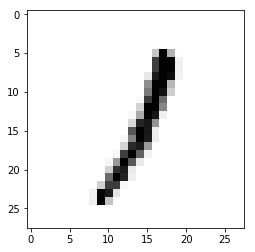

In [22]:
import matplotlib.pyplot
%matplotlib inline
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
# print(all_values)
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [23]:
# Score card for how well the network performs - start off empty
scorecard = []
if test_data_list[-1] == '\n':
    test_data_list = test_data_list[:test_data_list.__len__() - 1]
    
for record in test_data_list:
    
    all_values = record.split(',')

    # the first value is the correct label
    correct_label = int(all_values[0])
    print(correct_label, "Correct Label")

    # scale and shift input
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01

    # query the network
    outputs = n.query(inputs)

    # the index of the highest label corresponds to the label
    label = numpy.argmax(outputs)
    print(label, "Network's answer")

    # append correct or wrong on to the list
    if label == correct_label:
        # network's answer matches correct answer, add 1 to scorecard
        scorecard.append(1)
    else:
        scorecard.append(0)
        pass
pass

7 Correct Label
7 Network's answer
2 Correct Label
2 Network's answer
1 Correct Label
1 Network's answer
0 Correct Label
0 Network's answer
4 Correct Label
4 Network's answer
1 Correct Label
1 Network's answer
4 Correct Label
7 Network's answer
9 Correct Label
4 Network's answer
5 Correct Label
4 Network's answer
9 Correct Label
7 Network's answer


In [24]:
print(scorecard)
# Wow! 60% success with training record of just 100-record training set
scorecard_array = numpy.asfarray(scorecard)
print("Perf = ", scorecard_array.sum()/ scorecard_array.size * 100, "%")

[1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
Perf =  60.0 %
